# Data Science Project - Predicting Fraud in Insurance Claims Using Machine Learning 

## 1. Aims, objectives and plan




### 1.1 Aims and Objectives of the Project


The primary aim of this project is to develop a unbiased predictive model to assist an insurance company in identifying potential fraudulent claims while minimising customer loss due to false referrals. The model should meet the following key business and technical objectives:

1. **Business Perspective**:
   - Using a model in which the gross profit, amounts to double the claims, and their customer base has 10% claim rate, find how many customers they have. 
   - Given the model, what the charge for each policy.
   - Quantify the financial impact of prediction errors using a pricing model.

2. **Technical Perspective**:
   - Preprocess the data data removing any noisty attributes, synsoymoys attributes, feature selection/extraction, collinearaity, rescaling, missing and dupicate values and class imbalance
   - Build a robust data analysis pipeline using Python and Jupyter Notebook.
   - Apply two advanced machine learning techniques to solve the binary classification problem.
   - Apply cross validation to the techniques and performance metrics to compare results
   - Test the techniques on the test data and evaluate the performance of the models using appropriate metrics.
   - Ensure balanced performance with an error rate of less than 5%.





In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

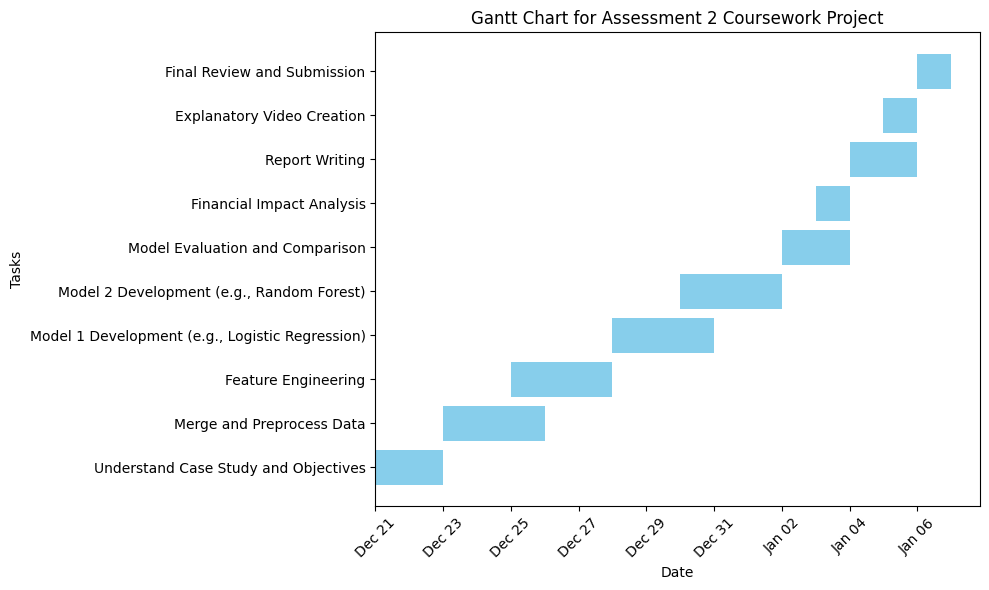

In [5]:
# Define tasks, start dates, and durations
tasks = [
    "Understand Case Study and Objectives",
    "Merge and Preprocess Data",
    "Feature Engineering",
    "Model 1 Development (e.g., Logistic Regression)",
    "Model 2 Development (e.g., Random Forest)",
    "Model Evaluation and Comparison",
    "Financial Impact Analysis",
    "Report Writing",
    "Explanatory Video Creation",
    "Final Review and Submission"
]

start_dates = [
    datetime(2024, 12, 21),
    datetime(2024, 12, 23),
    datetime(2024, 12, 25),
    datetime(2024, 12, 28),
    datetime(2024, 12, 30),
    datetime(2025, 1, 2),
    datetime(2025, 1, 3),
    datetime(2025, 1, 4),
    datetime(2025, 1, 5),
    datetime(2025, 1, 6)
]

durations = [2, 3, 3, 3, 3, 2, 1, 2, 1, 1]  # Durations in days

# Calculate end dates
end_dates = [start_dates[i] + timedelta(days=durations[i]) for i in range(len(tasks))]

#DataFrame for plotting
gantt_data = pd.DataFrame({
    "Task": tasks,
    "Start": start_dates,
    "End": end_dates
})

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through tasks to plot
for i, task in enumerate(gantt_data["Task"]):
    ax.barh(task, (gantt_data["End"][i] - gantt_data["Start"][i]).days, left=gantt_data["Start"][i], color="skyblue")

# Format the x-axis for dates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45)

# labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Tasks")
ax.set_title("Gantt Chart for Assessment 2 Coursework Project")

# Display the chart
plt.tight_layout()
plt.show()


## 2. Understanding the case study

### 1.1 Key Points Identified in the Case and Plan to Address Them

   1. **Objective of the Model**
   - The primary goal is to develop a predictive model that can accurately identify fraudulent insurance claims while minimising financial losses due to false positives and false negatives.
   - Plan: Implement a binary classification model that can distinguish between genuine and fraudulent claims with high precision and recall. Evalute two machine learning techniques; a tree based model such as gradientboost and multi-layer perceptron neural network technique. Use balanced performance metrics to evaluate each of the model's effectiveness in minimising errors.

   2. **Dataset Quality and Preprocessing**
   - The dataset may contain missing values, noisy attributes, redundant information, and class imbalance, which can affect model performance. 
   - Plan: Perform thorough data preprocessing to handle missing values, remove noisy and redundant attributes, address class imbalance, and rescale numerical features as necessary. Implement feature selection/extraction to reduce dimensionality and collinearity.

   3. **Impact of False Positives and False Negatives**
   - False positives can lead to genuine claims being flagged as fraudulent, resulting in customer dissatisfaction and financial loss. False negatives allow fraudulent claims to pass undetected, leading to direct financial losses.
   - Plan: Implement cost-sensitive learning to incorporate the financial impact of errors into model training. Use balanced performance metrics such as the F1-score, precision, and recall to evaluate models.

   4. **Model Validation and Evaluation**
   - The model should be validated using cross-validation techniques to ensure robustness and generalisation to unseen data. Performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC should be used to evaluate model effectiveness.
   - Plan: Apply k-fold cross-validation to evaluate model performance on training data. Use appropriate performance metrics to compare the effectiveness of the two machine learning techniques. Test the final models on the test data to assess their performance in a real-world scenario.



## 3. Pre-processing applied



### 3.1 Merging, Pivoting and melting if necessary

In [6]:
import pandas as pd
import numpy as np

claims = pd.read_csv(r'archive 2\archive\TrainData\TrainData\Train_Claim.csv')
demographics = pd.read_csv(r'archive 2\archive\TrainData\TrainData\Train_Demographics.csv')
policy = pd.read_csv(r'archive 2\archive\TrainData\TrainData\Train_Policy.csv')
vehicle = pd.read_csv(r'archive 2\archive\TrainData\TrainData\Train_Vehicle.csv')
target = pd.read_csv(r'archive 2\archive\TrainData\TrainData\Traindata_with_Target.csv')
#withouttargets = pd.read_csv(r'archive 2\archive\TrainData\TrainData\Traindata_withoutTarget.csv')

In [7]:
df_merged = (
    claims
    .merge(demographics, on="CustomerID", how="left")
    .merge(policy, on="CustomerID", how="left")
    .merge(vehicle, on="CustomerID", how="left")
    .merge(target, on="CustomerID", how="left")
)

print(df_merged.shape)
df_merged.head()


(115344, 40)


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute,VehicleAttributeDetails,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleID,Vehicle26917,N
1,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleModel,A5,N
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleYOM,2008,N
3,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleMake,Audi,N
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,VehicleYOM,2006,N


In [8]:
df_merged.head()  # Verifying column names and keys to merge datasets and identify potential issues with nomenclature

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute,VehicleAttributeDetails,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleID,Vehicle26917,N
1,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleModel,A5,N
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleYOM,2008,N
3,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleMake,Audi,N
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,VehicleYOM,2006,N


In [9]:
#I will create a key for each instance in the dataset by concatenting 'CustomerID' and 'DateOfIncident' to uniquely identify each claim. 
# This will help in pivoting/melting dataset and identifying potential issues with duplicates

df_merged['CustomerID'] = df_merged['CustomerID'].astype(str)
df_merged['DateOfIncident'] = pd.to_datetime(df_merged['DateOfIncident'])
df_merged['Unique_ID'] = df_merged['CustomerID'] + df_merged['DateOfIncident'].dt.strftime('%Y%m%d')
df_merged.head()


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute,VehicleAttributeDetails,ReportedFraud,Unique_ID
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,State1,100/300,1000,1632.73,0,not-in-family,VehicleID,Vehicle26917,N,Cust1000020150203
1,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,State1,100/300,1000,1632.73,0,not-in-family,VehicleModel,A5,N,Cust1000020150203
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,State1,100/300,1000,1632.73,0,not-in-family,VehicleYOM,2008,N,Cust1000020150203
3,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,State1,100/300,1000,1632.73,0,not-in-family,VehicleMake,Audi,N,Cust1000020150203
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,State1,100/300,1000,1255.19,0,not-in-family,VehicleYOM,2006,N,Cust1000120150202


In [10]:
#create table of distinct values in each column for categorical columns
distinct_values_cat = df_merged.select_dtypes(include='object').nunique()
distinct_values_cat

CustomerID                    28836
TypeOfIncident                    4
TypeOfCollission                  4
SeverityOfIncident                4
AuthoritiesContacted              4
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
PropertyDamage                    3
Witnesses                         5
PoliceReport                      3
AmountOfTotalClaim            21976
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
Country                           1
DateOfPolicyCoverage           6779
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
InsuredRelationship               6
VehicleAttribute                  4
VehicleAttributeDetails       28911
ReportedFraud                     2
Unique_ID                     28836
dtype: int64

In [11]:
#print the first five values of the columns 'VehicleAttribute' and 'VehicleAttributeDetails'

vehicle_attributes = df_merged[['VehicleAttribute', 'VehicleAttributeDetails']]
vehicle_attributes.head()




,VehicleAttribute,VehicleAttributeDetails
0,VehicleID,Vehicle26917
1,VehicleModel,A5
2,VehicleYOM,2008
3,VehicleMake,Audi
4,VehicleYOM,2006


The data is “long” rather than “wide.” Instead of having one row per vehicle with columns like VehicleID, VehicleModel, VehicleYOM, VehicleMake, we see multiple rows for a single vehicle record, each row describing one attribute. I'll  pivot the data to make it “wide” so that each vehicle record is represented by a single row with all attributes as columns.

In [12]:
#I will write key processes as methods to be reused in the pipeline if needed

def group_vehicle_attributes_by_customer_and_date(df):
    """
    Groups rows by (CustomerID, DateOfIncident) and includes:
      - Aggregated leftover columns (e.g., TypeOfIncident, SeverityOfIncident, etc.)
      - Pivoted VehicleAttribute columns (VehicleID, VehicleModel, VehicleYOM, VehicleMake, etc.)

    Returns a single DataFrame with all columns plus pivoted vehicle attributes.
    """

    #Identify columns that belong to VehicleAttribute pivoting
    #  and the columns we want to aggregate by (CustomerID, DateOfIncident, etc.).
    pivot_cols = ["VehicleAttribute", "VehicleAttributeDetails"]
    group_cols = ["CustomerID", "DateOfIncident"]

    # The leftover columns are the ones we want to keep as-is.
    
    leftover_cols = [
        c for c in df.columns 
        if c not in (group_cols + pivot_cols)
    ]

    # Aggregate leftover columns by taking the first row in each (CustomerID, DateOfIncident) group
   
    df_agg = (
        df.groupby(group_cols, as_index=False)[leftover_cols]
          .agg("first")  
    )

    # Pivot the vehicle attributes so each attribute becomes a column

    pivoted = (
        df.pivot_table(
            index=group_cols,
            columns="VehicleAttribute",
            values="VehicleAttributeDetails",
            aggfunc=lambda x: ",".join(x)  # combine multiple values with commas
        )
        .reset_index()
    )

   #flatten pivot table if needed 
    pivoted.columns.name = None  # remove top-level name
    pivoted = pivoted.rename_axis(None, axis=1)  # remove index name if needed

    # Merge the aggregated leftover columns with the pivoted vehicle attributes
    final_df = pd.merge(df_agg, pivoted, on=group_cols, how="left")

    # Reorder columns so that group_cols come first, then leftover_cols, then pivoted columns
    pivoted_attribs = sorted(set(pivoted.columns) - set(group_cols))
    final_cols = group_cols + leftover_cols + pivoted_attribs
    final_cols = [c for c in final_cols if c in final_df.columns]  # only keep existing
    final_df = final_df[final_cols]

    return final_df


In [13]:
df_pivot = group_vehicle_attributes_by_customer_and_date(df_merged)
df_pivot


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud,Unique_ID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,1000,1632.73,0,not-in-family,N,Cust1000020150203,Vehicle26917,Audi,A5,2008
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,1000,1255.19,0,not-in-family,N,Cust1000120150202,Vehicle15893,Audi,A5,2006
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,617,1373.38,0,wife,N,Cust1000220150115,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,722,1337.60,0,own-child,N,Cust1000320150119,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,500,1353.73,4279863,unmarried,N,Cust1000420150109,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,655,1276.01,0,unmarried,N,Cust999320150124,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,1089,1273.38,0,unmarried,N,Cust999420150209,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,787,1380.92,3448735,own-child,N,Cust999620150128,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,780,1389.29,3364301,not-in-family,N,Cust999720150128,Vehicle10240,Suburu,Forrestor,2004


### 3.2 Identifying and dealing with class imbalance, if necessary
#### Data Splitting and Validation

To avoid data leakage, I will split the data into training and test sets before performing any preprocessing steps. I will use a stratified split to ensure that the class distribution is maintained in both sets. I will also perform a preliminary check to ensure that the split was successful and that the class distribution is balanced in both sets.

In [14]:
# split the data  

df = df_pivot
X = df.drop(columns=["ReportedFraud"])
y = df["ReportedFraud"]

from sklearn.model_selection import train_test_split

# Train (80%) vs. Test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,        # 20% for test
    random_state=42,       # ensures reproducibility
    stratify=y             # maintain class ratio, e.g., fraud/non-fraud
)


In [15]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(23068, 42)
(23068,)
(5768, 42)
(5768,)


In [16]:
# percentage of each class in y_train
fraud_train_counts = y_train.value_counts()
fraud_train_percent = y_train.value_counts(normalize=True) * 100


print("Fraud Distribution in the Training Set:")
for fraud_class in fraud_train_counts.index:
    count = fraud_train_counts[fraud_class]
    percent = fraud_train_percent[fraud_class]
    print(f"  {fraud_class}: {count} instances ({percent:.2f}%)")

Fraud Distribution in the Training Set:
  N: 16840 instances (73.00%)
  Y: 6228 instances (27.00%)


In [17]:
# Percentage of each class in y_test
fraud_test_counts = y_test.value_counts()
fraud_test_percent = y_test.value_counts(normalize=True) * 100


print("Fraud Distribution in the Test:") 
for fraud_class in fraud_test_counts.index:
    count = fraud_test_counts[fraud_class]
    percent = fraud_test_percent[fraud_class]
    print(f"  {fraud_class}: {count} instances ({percent:.2f}%)")

Fraud Distribution in the Test:
  N: 4211 instances (73.01%)
  Y: 1557 instances (26.99%)


The split suggests that the class distribution is maintained in both the training and test sets, indicating a successful stratified split. The training set contains 80% of the data, while the test set contains 20%. The class distribution is balanced in both sets, with approximately 27% of claims being fraudulent in each set.

### 3.3 Appropriate feature extraction, if necessary

#### Dates and Times

The dates and times can be extracted from the 'DateOfIncident' and 'DateOfClaim' columns to create new features such as 'DayOfWeek', 'Month', 'Year', 'Weekday', 'Weekend', 'TimeOfDay', etc. These features can make it more convient for machine learning models to learn patterns in the data aswell as for calculations.

In [18]:


def process_incident_and_policy_dates(df, 
                                      incident_col='DateOfIncident', 
                                      policy_col='DateOfPolicyCoverage', incident_year_col='IncidentYear',vehicle_yom_col='VehicleYOM'):
    """
    Converts the incident and policy coverage dates to datetime,
    then creates columns for year/month/day of incident and
    calculates policy age in days.
    
    Parameters:
 
    df : pd.DataFrame
        The DataFrame containing date columns.
    incident_col : str
        Column name with the incident date.
    policy_col : str
        Column name with the policy coverage start date.

    Returns:

    pd.DataFrame
        The original DataFrame with new columns added:
            - IncidentYear
            - IncidentMonth
            - IncidentDay
            - PolicyAgeDays
    """

    # Convert incident date to datetime
    df[incident_col] = pd.to_datetime(df[incident_col], errors='coerce')
    
    # Extract components of the incident date
    df['IncidentYear'] = df[incident_col].dt.year
    df['IncidentMonth'] = df[incident_col].dt.month
    df['IncidentDay'] = df[incident_col].dt.day

    # Convert policy coverage date to datetime
    df[policy_col] = pd.to_datetime(df[policy_col], errors='coerce')

    # Calculate the number of days between incident and policy coverage
    df['PolicyAgeDays'] = (df[incident_col] - df[policy_col]).dt.days

    # Convert both columns to numeric (int)
    df[incident_year_col] = pd.to_numeric(df[incident_year_col], errors='coerce')
    df[vehicle_yom_col]   = pd.to_numeric(df[vehicle_yom_col], errors='coerce')
    
    # Calculate age at incident in years
    df['AgeAtIncident'] = df[incident_year_col] - df[vehicle_yom_col]

    return df


In [19]:
#apply the function to the training and test data
X_train_grouped = process_incident_and_policy_dates(X_train)
X_test_grouped = process_incident_and_policy_dates(X_test)


In [20]:
#check for data integrity
print(X_train_grouped['Unique_ID'].nunique)
print(X_train_grouped.shape)
print(X_test_grouped.shape)
print(y_train.shape)
print(y_test.shape)


<bound method IndexOpsMixin.nunique of 20936    Cust3542720150227
19307    Cust3344820150208
2609     Cust1315920150117
15420    Cust2870520150225
21007    Cust3551220150110
               ...        
27962     Cust881320150222
10263    Cust2239220150225
11822    Cust2422820150114
8667     Cust2048020150216
10825    Cust2303720150103
Name: Unique_ID, Length: 23068, dtype: object>
(23068, 47)
(5768, 47)
(23068,)
(5768,)


### 3.4 Dealing with Missing Values (Imputation/Filtering) without Leakage

In [21]:
#missing values in the training set 
missing_values = X_train_grouped.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

AuthoritiesContacted    2144
InsuredGender             23
Country                    1
dtype: int64

In [22]:
#other categories of missing values such as 'Unknown' or 'MISSEDDATA' or '?'
unknown_values = X_train_grouped.isin(['Unknown', 'MISSEDDATA', '?']).sum()
unknown_values = unknown_values[unknown_values > 0]
unknown_values

TypeOfCollission      4104
PropertyDamage        8375
PoliceReport          7830
AmountOfTotalClaim      40
dtype: int64

In [23]:
#other potential missing data categories such as 'Not Available' or 'N/A'
na_values = X_train_grouped.isin(['Not Available', 'N/A']).sum()
na_values = na_values[na_values > 0]
na_values

Series([], dtype: int64)

#### Unifying Missing Values

In [24]:

def unify_missing_values(df, extra_missing=None):
    """
    Converts placeholders like '?' and 'MISSEDDATA' (and any extra you pass) into np.nan.
    Returns a new DataFrame with unified missing values.
    
    Parameters:
    
    df : pd.DataFrame
        The DataFrame whose missing placeholders you want to standardize.
    extra_missing : list of str, optional
        Additional string placeholders that should be converted to np.nan.
        
    Returns:
 
    pd.DataFrame
        A copy of the original DataFrame, with all missing placeholders replaced by np.nan.
    """
    # Default placeholders 
    placeholders = ['?', 'MISSEDDATA']
    
    #  passed additional placeholders
    if extra_missing is not None:
        placeholders.extend(extra_missing)
    
    # Replace all placeholders with np.nan
   
    df_clean = df.replace(placeholders, np.nan)
    
    return df_clean


In [25]:
#apply the function to the training and test data
X_train_clean = unify_missing_values(X_train_grouped)
X_test_clean = unify_missing_values(X_test_grouped)


In [26]:
print(X_train_clean.shape)
print(X_test_clean.shape)

(23068, 47)
(5768, 47)


#### Check for Missing Values

In [27]:


def check_missing_values(df):
    """
    Checks for missing values in a DataFrame and returns a summary DataFrame
    containing both the absolute number of missing values and their percentage.

    Parameters
  
    df : pd.DataFrame
        The DataFrame to analyse.

    Returns
   
    pd.DataFrame
        A DataFrame with two columns: 
        - "Missing Values" (the count of NaNs in each column)
        - "Percentage Missing (%)" (the percentage of NaNs in that column).
        Only columns with missing values are listed.

    """
    # Count total NaNs in each column
    missing = df.isnull().sum()
    # Filter out columns that have no missing values
    missing = missing[missing > 0]
    # Calculate the percentage of missing values
    percentage_missing = (missing / len(df)) * 100
    
    # Create a summary DataFrame
    missing_values_df = pd.DataFrame({
        "Missing Values": missing,
        "Percentage Missing (%)": percentage_missing
    })
    
    return missing_values_df


In [28]:
missing_values_train_train = check_missing_values(X_train_clean)
missing_values_train_train

,Missing Values,Percentage Missing (%)
TypeOfCollission,4104,17.790879
AuthoritiesContacted,2144,9.294260
PropertyDamage,8375,36.305705
PoliceReport,7830,33.943125
AmountOfTotalClaim,40,0.173400
InsuredGender,23,0.099705
Country,1,0.004335


In [29]:
missing_values_test = check_missing_values(X_test_clean)
missing_values_test

,Missing Values,Percentage Missing (%)
TypeOfCollission,1058,18.342580
AuthoritiesContacted,548,9.500693
PropertyDamage,2084,36.130374
PoliceReport,1975,34.240638
AmountOfTotalClaim,10,0.173370
InsuredGender,7,0.121359
Country,1,0.017337


#### Imputation Strategy

In order to develop an imputation strategy, I will see if gender has any direct bearing on fields such as hobbies and interests. If there is a correlation, the gender can be inferred from the hobbies and interests. 

In [30]:


# Group by Hobbies and Gender, count number of rows
hobby_gender_counts = (
    X_train_clean
    .groupby(['InsuredHobbies', 'InsuredGender'])
    .size()
    .unstack(fill_value=0)  # Convert to columns = ['F', 'M'], fill missing with 0
)

# Convert counts to percentages (row-wise)
hobby_gender_percent = hobby_gender_counts.div(hobby_gender_counts.sum(axis=1), axis=0) * 100

# Print or inspect
print(hobby_gender_percent)


InsuredGender      FEMALE       MALE
InsuredHobbies                      
base-jumping    47.147651  52.852349
basketball      46.650426  53.349574
board-games     53.019538  46.980462
bungie-jumping  54.829545  45.170455
camping         52.193309  47.806691
chess           57.113188  42.886812
cross-fit       51.717370  48.282630
dancing         59.756098  40.243902
exercise        61.624204  38.375796
golf            54.402790  45.597210
hiking          51.219512  48.780488
kayaking        65.495706  34.504294
movies          51.915240  48.084760
paintball       57.528090  42.471910
polo            48.805147  51.194853
reading         54.838710  45.161290
skydiving       57.592093  42.407907
sleeping        55.730810  44.269190
video-games     55.460017  44.539983
yachting        46.740995  53.259005


In [31]:
# Group by Occupation and Gender, get counts
occ_gender_counts = (
    X_train_clean
    .groupby(['InsuredOccupation', 'InsuredGender'])
    .size()
    .unstack(fill_value=0)
)

# Convert to percentages
occ_gender_percent = occ_gender_counts.div(occ_gender_counts.sum(axis=1), axis=0) * 100

# Print or inspect
print(occ_gender_percent)


InsuredGender         FEMALE       MALE
InsuredOccupation                      
adm-clerical       58.942559  41.057441
armed-forces       50.945699  49.054301
craft-repair       54.821742  45.178258
exec-managerial    48.711944  51.288056
farming-fishing    58.550039  41.449961
handlers-cleaners  52.468619  47.531381
machine-op-inspct  51.351351  48.648649
other-service      52.918538  47.081462
priv-house-serv    51.875000  48.125000
prof-specialty     56.825397  43.174603
protective-serv    56.350365  43.649635
sales              57.017544  42.982456
tech-support       58.810198  41.189802
transport-moving   52.797619  47.202381


No evident correlation for gender with hobbies and interests. Therefore, I will use the mode imputation strategy to fill missing values

Observations:

Categorical and numerical features with low or medium percentage missing values can be need not be dropped and can be imputed with a separate category called 'Unknown' or the mode value.

Categorical Values:
AmountOfTotalClaim, InsuredGender, Country have very low missing rates (<1%)
TypeOfCollission has moderate missing (~18%)
AuthoritiesContacted has moderate missing (~9%)

Numerical
Amount of Total Claim has very low missing rates (<1%) and can be imputed with the median value.

Categories with high missing values:
PropertyDamage and PoliceReport each have over 30% missing.
I can evaluate if losing an feature is worse than risking biased imputations. In prediction fraud, these features may be important, so we will impute them with a separate category called 'Unknown', as the missing values may carry information and are not above 40%


In [32]:
#change AmountOfTotalClaim to float
df = X_train_clean
df['AmountOfTotalClaim'] = df['AmountOfTotalClaim'].astype(float)

df = X_test_clean
df['AmountOfTotalClaim'] = df['AmountOfTotalClaim'].astype(float)

### 3.5 Dealing with duplicate values, if necessary 

In [ ]:
 # Based on unique ID, there are no duplicate rows in the dataset.

### 3.6 Categorical and Numerical Encoding if Necessary

I will identify categorical and numerical columns in the dataset and encode them appropriately. Categorical columns will be one-hot encoded, while numerical columns can be scaled if needed. I will also check for any remaining missing values and handle them accordingly. I can also use frequency encoding for categorical columns with high cardinality to reduce dimensionality.

In [33]:
def get_numeric_and_categorical_columns(df):
    """
    Identifies numeric  and categorical  columns in the DataFrame.
    
    Parameters
  
    df : pd.DataFrame
        The DataFrame to analyze.

    Returns
   
    numerical_columns : list
        A list of column names that have int or float data types.
    categorical_columns : list
        A list of column names that have object data types.

    """
    numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    return numerical_columns, categorical_columns



In [34]:
num_cols, cat_cols = get_numeric_and_categorical_columns(X_train_clean)
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'VehicleYOM', 'IncidentYear', 'IncidentMonth', 'IncidentDay', 'PolicyAgeDays', 'AgeAtIncident']
Categorical columns: ['CustomerID', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'Country', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'Unique_ID', 'VehicleID', 'VehicleMake', 'VehicleModel']


In [35]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')

categorical_imputer = SimpleImputer(strategy='most_frequent')

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define separate pipelines for numeric and categorical
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
    # Add other numeric transforms if needed, e.g. StandardScaler
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
    # Add other categorical transforms if needed, e.g. OneHotEncoder
])

# Combine them in a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])




In [36]:
# Fit on training data
preprocessor.fit(X_train_clean)

# Transform training data
X_train_imputed = preprocessor.transform(X_train_clean)

# Transform test data
X_test_imputed = preprocessor.transform(X_test_clean)

#make dataframe 
X_train_imputed = pd.DataFrame(X_train_imputed, columns=num_cols + cat_cols)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=num_cols + cat_cols)


In [37]:
check_missing_values(X_train_imputed)

,Missing Values,Percentage Missing (%)
AuthoritiesContacted,2144,9.294260
InsuredGender,23,0.099705
Country,1,0.004335


In [38]:
#add 'missing' category to categorical columns with missing values
X_train_imputed.fillna('missing', inplace=True)
X_test_imputed.fillna('missing', inplace=True)


C:\Users\saqib\AppData\Local\Temp\ipykernel_30288\1039554909.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_imputed.fillna('missing', inplace=True)
C:\Users\saqib\AppData\Local\Temp\ipykernel_30288\1039554909.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_imputed.fillna('missing', inplace=True)


In [39]:
#check missing values
print("Missing values in the training set after adding 'missing' category:")
check_missing_values(X_train_imputed)
check_missing_values(X_test_imputed)


Missing values in the training set after adding 'missing' category:


,Missing Values,Percentage Missing (%)


#### Frequency Encoding

In [40]:


#distinct object columns

distinct_values = X_train_clean.select_dtypes(include='object').nunique()
#distinct_values = X_train_clean.nunique()
distinct_values

CustomerID                    23068
TypeOfIncident                    4
TypeOfCollission                  3
SeverityOfIncident                4
AuthoritiesContacted              4
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
PropertyDamage                    2
Witnesses                         5
PoliceReport                      2
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
Country                           1
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
InsuredRelationship               6
Unique_ID                     23068
VehicleID                     23068
VehicleMake                      15
VehicleModel                     39
dtype: int64

In [41]:
def frequency_encode_columns(df, columns, drop_original=False, suffix="_freq"):
    """
    Applies frequency encoding to the given columns in a DataFrame.
    Creates new columns named <col> + <suffix> by default.
    
    Parameters
   
    df : pd.DataFrame
        The DataFrame with columns to be encoded.
    columns : list of str
        A list of column names in df to frequency-encode.
    drop_original : bool, optional
        If True, drop the original columns after encoding. Default is False.
    suffix : str, optional
        Suffix to append to the new encoded column names. Default is "_freq".
        
    Returns

    pd.DataFrame
        A DataFrame with the new frequency-encoded columns added.
        If drop_original=True, the original columns are removed.
    """
    
    df_encoded = df.copy()  # Work on a copy 
    
    for col in columns:
        # 1) Compute frequency counts
        freq_map = df_encoded[col].value_counts().to_dict()
        
        # 2) Create the frequency-encoded column
        new_col_name = col + suffix
        df_encoded[new_col_name] = df_encoded[col].map(freq_map)
        
        # 3) Optionally drop the original column
        if drop_original:
            df_encoded.drop(columns=[col], inplace=True)

    return df_encoded


In [42]:
#apply frequency encoding to the 'IncidentAddress' column
X_train_fre_encoded = frequency_encode_columns(X_train_clean, ["IncidentAddress"], drop_original=True)
X_test_fre_encoded = frequency_encode_columns(X_test_clean, ["IncidentAddress"], drop_original=True)

### 3.7 Dealing with correlation and collinearity, if necessary  

Correlation and collinearity will be assessed to identify redundant features that may affect model performance. 

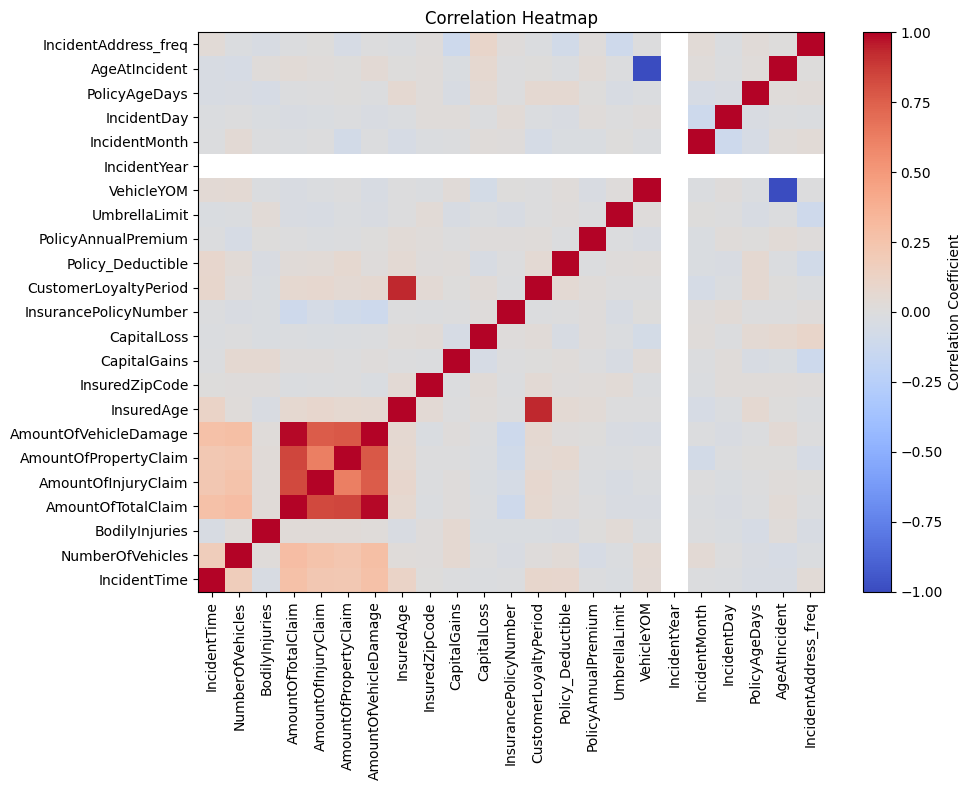

In [43]:
import matplotlib.pyplot as plt
import numpy as np


corr_matrix = X_train_fre_encoded.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

# Plot the correlation matrix 
im = plt.imshow(corr_matrix, cmap="coolwarm", origin="lower", aspect="auto")

# Add a colorbar 
cbar = plt.colorbar(im)
cbar.set_label("Correlation Coefficient")

# Add title
plt.title("Correlation Heatmap")

# Set ticks and labels for x and y axes
num_features = len(corr_matrix.columns)
plt.xticks(np.arange(num_features), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(num_features), corr_matrix.columns)


plt.tight_layout()

plt.show()


In [44]:

# Select numeric columns for correlation matrix calculation
numeric_data = X_train_fre_encoded.select_dtypes(include=[np.number])

# Calculate correlation matrix of numeric features
corr_matrix = numeric_data.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns with correlation above a chosen threshold
threshold = 0.9
redundant_features = [
    column for column in upper.columns if any(upper[column] > threshold)
]

print("Highly correlated features:", redundant_features)



Highly correlated features: ['AmountOfVehicleDamage', 'CustomerLoyaltyPeriod', 'AgeAtIncident']


In [45]:
#following columns can be removed as they have little to no impact on the target e.g. VehicleID, 
#or are redundant e.g. Unique_ID 
# or are highly correlated and represent the same information e.g. Customer loyalty period and age at incident

#Incident Year has a variance of 0, so it can be removed as well

columns_to_remove = ['IncidentYear','CustomerID','DateOfPolicyCoverage','VehicleID','Country','VehicleYOM','CustomerLoyaltyPeriod','Unique_ID','AmountOfTotalClaim']

#remove columns_to_remove from training and test sets

X_train_fre_encoded = X_train_fre_encoded.drop(columns=columns_to_remove)
X_test_fre_encoded = X_test_fre_encoded.drop(columns=columns_to_remove)

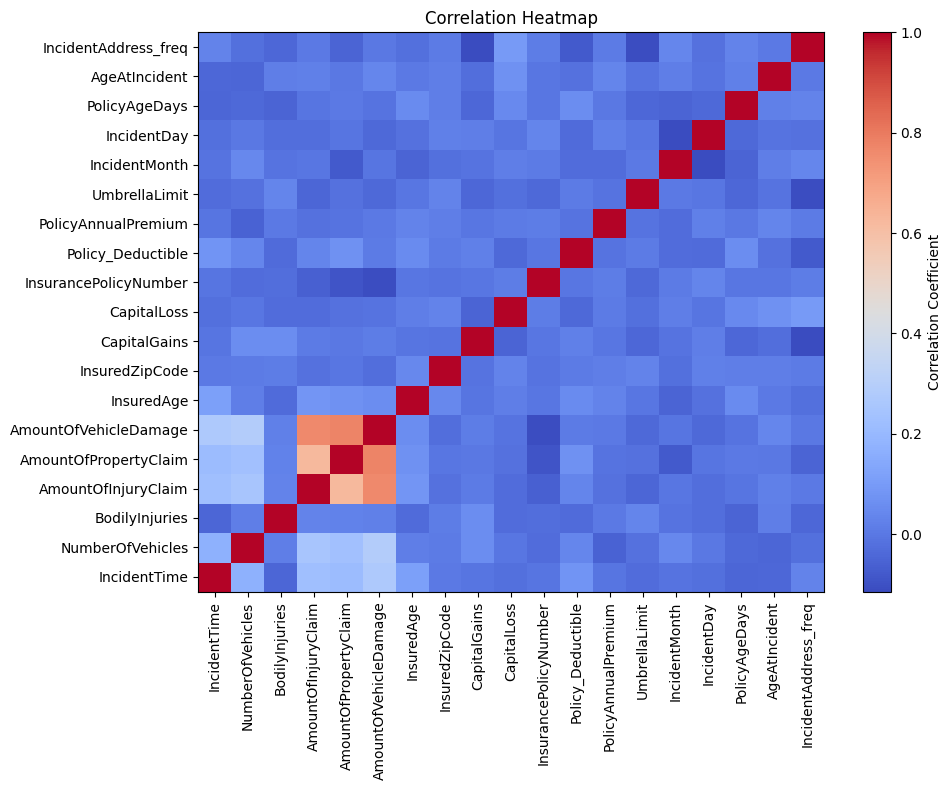

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = X_train_fre_encoded.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

# Display the correlation matrix using imshow
im = plt.imshow(
    corr_matrix, 
    cmap="coolwarm",   # same color scheme as in Seaborn
    aspect="auto",     # adjusts aspect ratio
    origin="lower"     # so that the [0,0] index is at the bottom-left
)

# Add a colorbar to show correlation scale
cbar = plt.colorbar(im)
cbar.set_label("Correlation Coefficient")

# Label the axes with feature names
num_features = len(corr_matrix.columns)
plt.xticks(np.arange(num_features), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(num_features), corr_matrix.columns)

plt.title("Correlation Heatmap")
plt.tight_layout()   # avoids label cut-off
plt.show()


### 3.8 Other Pre-processing

Certain fields have a high level of distinct values, and are not suitable for one-hot encoding and can lead to the curse of dimensionality. I will evaluate the cardinality of these fields and decide on an appropriate encoding strategy.

####  Feature Engineering: Zip Code Encoding

In [47]:
df = X_train_fre_encoded

unique_zip_codes = df['InsuredZipCode'].unique().size

print(f"Unique zip codes: {unique_zip_codes}")

Unique zip codes: 995


It seems there are 995 unique values for the insured zip code, which is too many for one-hot encoding. This can be droped or grouped into regions. As region can play an important part in fraud detection, it will be grouped into regions. The codes themselves do correlate with the Indian postal codes as the 4 and 6 digit at the start match the Indian postal code system. There are no codes started with any other digit. The codes will be grouped into regions based on the first two digits of the postal code. I will use Indian region names as labels for the grouping knowing that the codes are there simply for purposes of prediction and not for actual location.

Every code in the list falls into either Maharashtra (40–44), Madhya Pradesh (45–48), or Tamil Nadu (60–66). 

In [48]:
def pin_to_region(pin_code):
    # Convert to string just in case
    s = str(pin_code)
    first_two = int(s[:2])

    if 40 <= first_two <= 44:
        return "Maharashtra"
    elif 45 <= first_two <= 48:
        return "Madhya Pradesh"
    elif 60 <= first_two <= 66:
        return "Tamil Nadu"
    else:
        return "Other"  # or handle other states as needed


In [49]:
#Apply to training set

X_train_fre_encoded['Region'] = X_train_fre_encoded['InsuredZipCode'].apply(pin_to_region)
X_train_fre_encoded = X_train_fre_encoded.drop(columns=['InsuredZipCode'])
X_train_fre_encoded['Region'].value_counts()





Region
Madhya Pradesh    9902
Tamil Nadu        6978
Maharashtra       6188
Name: count, dtype: int64

In [50]:
#Apply to test set

X_test_fre_encoded['Region'] = X_test_fre_encoded['InsuredZipCode'].apply(pin_to_region)
X_test_fre_encoded = X_test_fre_encoded.drop(columns=['InsuredZipCode'])
X_test_fre_encoded['Region'].value_counts()

Region
Madhya Pradesh    2505
Tamil Nadu        1732
Maharashtra       1531
Name: count, dtype: int64

### 3.9 Variance analysis, if necessary

In [51]:


variance_per_column = X_train_fre_encoded.var(numeric_only=True)  # or df.std()

variance_per_column

IncidentTime             3.791831e+01
NumberOfVehicles         9.637541e-01
BodilyInjuries           6.131465e-01
AmountOfInjuryClaim      1.943763e+07
AmountOfPropertyClaim    1.899265e+07
AmountOfVehicleDamage    3.217226e+08
InsuredAge               6.418861e+01
CapitalGains             7.636088e+08
CapitalLoss              7.770723e+08
InsurancePolicyNumber    1.233447e+08
Policy_Deductible        2.981809e+05
PolicyAnnualPremium      4.998944e+04
UmbrellaLimit            3.904602e+12
IncidentMonth            2.660365e-01
IncidentDay              5.781666e+01
PolicyAgeDays            5.717444e+06
AgeAtIncident            2.822925e+01
IncidentAddress_freq     1.049851e+02
dtype: float64

- IncidentYear has 0 variance and can be dropped as it does not provide any information to the model.
- InsurancePolicyNumber can also be dropped as it provides no information to the model.
- Small variance columns such as BodilyInjuries and Number of Vehicles Involved will be kept as they may still provide valuable information for the model.

In [52]:
#drop InsurancePolicyNumber and IncidentYear

X_train_filled = X_train_fre_encoded.drop(columns=['InsurancePolicyNumber','DateOfIncident'])
X_test_filled = X_test_fre_encoded.drop(columns=['InsurancePolicyNumber','DateOfIncident'])

### 3.10 Scaling, without leaking, if necessary

This will depend on technique as tree based models for examples do not require scaling. However, scaling can be beneficial for other models such as SVM, k-NN, and neural networks. I will scale the numerical features as needed in the pipeline to ensure that all features are on the same scale.




In [53]:
df_num = X_train_filled.select_dtypes(include=[np.number])

df_num

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentMonth,IncidentDay,PolicyAgeDays,AgeAtIncident,IncidentAddress_freq
20936,4,3,2,10529,5901,34135,44,0,0,1000,1072.38,0,2,27,4526,7,28
19307,19,3,2,4978,4710,43613,40,0,-40600,1000,1441.49,0,2,8,8092,9,16
2609,8,1,2,347,693,2882,38,0,-43400,1507,1046.00,0,1,17,3922,14,39
15420,4,2,2,14503,14503,59684,33,45600,-61400,500,1216.26,3026658,2,25,6974,11,15
21007,14,1,0,6367,12735,43169,47,0,-55600,1181,1493.96,0,1,10,8370,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27962,10,3,0,5591,10472,41889,39,0,-71700,500,1349.37,0,2,22,466,4,24
10263,21,3,2,7590,4863,33917,32,69200,-36900,2000,1438.39,0,2,25,2806,12,22
11822,16,3,0,12538,11212,48826,43,54600,-45500,638,851.46,0,1,14,4435,11,22
8667,21,3,0,8729,8729,38353,45,33500,0,663,1298.81,0,2,16,7950,10,46


In [54]:
#catergorical columns 
df_cat = X_train_filled.select_dtypes(include=['object', 'category'])
df_cat


,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,PropertyDamage,Witnesses,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel,Region
20936,Multi-vehicle Collision,Front Collision,Major Damage,Fire,State4,City4,NaN,1,YES,MALE,Masters,prof-specialty,movies,State1,100/300,husband,Mercedes,Grand Cherokee,Tamil Nadu
19307,Multi-vehicle Collision,Side Collision,Minor Damage,Other,State8,City7,NaN,0,NaN,MALE,MD,protective-serv,sleeping,State2,100/300,own-child,Saab,93,Maharashtra
2609,Vehicle Theft,NaN,Trivial Damage,None,State9,City2,NaN,2,NO,MALE,Masters,transport-moving,video-games,State1,500/1000,husband,Suburu,Forrestor,Tamil Nadu
15420,Multi-vehicle Collision,Side Collision,Total Loss,Other,State5,City7,NaN,0,NO,MALE,JD,exec-managerial,paintball,State1,250/500,other-relative,BMW,X5,Maharashtra
21007,Single Vehicle Collision,Side Collision,Minor Damage,Fire,State7,City4,NO,0,NaN,FEMALE,MD,sales,kayaking,State3,100/300,not-in-family,Ford,Neon,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27962,Multi-vehicle Collision,Side Collision,Major Damage,Other,State5,City5,NO,3,NO,MALE,MD,machine-op-inspct,camping,State3,250/500,wife,BMW,M5,Madhya Pradesh
10263,Multi-vehicle Collision,Rear Collision,Major Damage,Police,State5,City2,YES,0,NO,FEMALE,College,craft-repair,skydiving,State3,100/300,husband,Mercedes,E400,Tamil Nadu
11822,Multi-vehicle Collision,Front Collision,Major Damage,Other,State4,City3,NO,3,NO,MALE,MD,priv-house-serv,board-games,State3,100/300,own-child,Dodge,RAM,Tamil Nadu
8667,Multi-vehicle Collision,Front Collision,Minor Damage,Police,State7,City5,NO,2,YES,MALE,College,transport-moving,dancing,State2,100/500,not-in-family,Audi,A3,Tamil Nadu


In [55]:
distinct_values = df_cat.nunique()
distinct_values

TypeOfIncident                 4
TypeOfCollission               3
SeverityOfIncident             4
AuthoritiesContacted           4
IncidentState                  7
IncidentCity                   7
PropertyDamage                 2
Witnesses                      5
PoliceReport                   2
InsuredGender                  2
InsuredEducationLevel          7
InsuredOccupation             14
InsuredHobbies                20
InsurancePolicyState           3
Policy_CombinedSingleLimit     9
InsuredRelationship            6
VehicleMake                   15
VehicleModel                  39
Region                         3
dtype: int64

### One-Hot Encoding

In [56]:
import pandas as pd

def one_hot_encode_for_fraud_analysis(df, target_col='ReportedFraud', drop_first=False):
    """
    One-hot encodes all categorical columns (object/category) in the DataFrame
    except for the specified target column, typically used in fraud analysis.

    Parameters
  
    df : pd.DataFrame
        The DataFrame containing both numeric and categorical columns.
    target_col : str, optional
        The name of the target column (e.g., 'ReportedFraud'). If this column
        is a string type and you do not want to one-hot encode it, specify it here.
        Default is 'ReportedFraud'.
    drop_first : bool, optional
        Whether to drop the first category in each encoded feature to avoid
        the dummy variable trap. Default is False.

    Returns
 
    pd.DataFrame
        A new DataFrame with the categorical features encoded except for the target column.

    """
    # Identify all object/category columns
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    
    # Exclude the target column if in cat_cols
    if target_col in cat_cols:
        cat_cols.remove(target_col)
    
    # One-hot encode the remaining categorical columns
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=drop_first)
    
    return df_encoded

In [57]:
X_train_ohe = one_hot_encode_for_fraud_analysis(X_train_filled,drop_first=True)
X_test_ohe = one_hot_encode_for_fraud_analysis(X_test_filled,drop_first=True)



In [58]:
print(X_train_ohe.shape)
print(X_test_ohe.shape)

(23068, 154)
(5768, 154)


#### Check Point

In [59]:
print(X_train_ohe.shape)
print(y_train.shape)

print(X_test_ohe.shape)
print(y_test.shape)

#previous resuls
# (92275, 40)
# (23069, 40)
# (92275,)
# (23069,)

(23068, 154)
(23068,)
(5768, 154)
(5768,)


Numbers are as expected. I can save the preprocessed data to a checkpoint file to avoid repeating the preprocessing steps in case of any issues. This will allow me to reload the preprocessed data and continue with the analysis without starting from scratch.

In [60]:
#checkpoint


X_train_ohe.to_csv('checkpoint/encoded_xtrain_checkpoint.csv', index = False)
X_test_ohe.to_csv('checkpoint/encoded_xtest_checkpoint.csv', index = False)

y_train.to_csv('checkpoint/encoded_ytrain_checkpoint.csv', index = False)
y_test.to_csv('checkpoint/encoded_ytest_checkpoint.csv', index = False)


## 4. Technique 1: P (Multi-Layer Perceptron)


### 4.1 Motivation for choosing the technique and schematic figure of the analysis process

In [113]:

from IPython.display import Image, display
import os

**Rationale for Choosing a Multi-Layer Perceptron (MLP) for Binary Classification**

I had tried a number of different models and found the MLP gave one of the best results. A Multi-Layer Perceptron (MLP) is well-suited for binary classification tasks because it can model complex, non-linear relationships between features and the target variable. By utilising multiple hidden layers and non-linear activation functions, MLPs can learn intricate decision boundaries that would be difficult to achieve with linear models alone. 

MLPs also offer a high degree of flexibility and adaptability, allowing them to capture a wide range of data patterns without the need for extensive feature engineering. As a result, they can handle large datasets and high-dimensional feature spaces effectively, can be useful for fraud detection, where subtle anomalies may not follow simple patterns. 



Building pipeline for the MLP

The pipeline consists of the following key components:


- Pipeline: built with scikit-learn  
- Data Scaling (StandardScaler): normalises features to a mean of 0 and standard deviation of 1, helping the neural network converge faster by ensuring features are on a similar scale.  
- Feature Selection (SelectKBest): uses an ANOVA F-test to remove less informative features, allowing the MLP to focus on the 20 most relevant inputs.  
- Classifier (MLPClassifier): A Multi-Layer Perceptron with hidden layers of neurons and a ReLU activation function (see the next section for details).  
- Early Stopping: prevents overfitting and saves time by halting training when the validation loss stops decreasing, capturing the minimal point on the learning curve.  
-Class Imbalance: as the MLP does not have built-in handling for class imbalance, the `imblearn` library (part of the scikit-learn contrib projects) is used.  
  - SMOTE: creates synthetic samples of the minority class.  
  - ClusterCentroids: undersamples the majority class.  



![MLP Scheme](mlpscheme.png)


The pipeline ensures the same scaling and feature selection steps are applied in every cross-validation fold during hyperparameter tuning. StratifiedKFold splits the data in a way that keeps class proportions the same, making the results fair. Finally, to handle uneven class sizes, we calculate class weights and use them in training so that the minority class is not overshadowed by the majority class.

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
y_train_mapped = y_train.map({'Y': 1, 'N': 0})
y_train_mapped.value_counts()

ReportedFraud
0    16840
1     6228
Name: count, dtype: int64

In [63]:
#map the target column to 1 and 0

y_test_mapped = y_test.map({'Y': 1, 'N': 0})
y_test_mapped.value_counts()

ReportedFraud
0    4211
1    1557
Name: count, dtype: int64

In [64]:
print(X_train_ohe.shape)
print(y_train_mapped.shape)

print(X_test_ohe.shape)
print(y_test_mapped.shape)

#previous resuls
# (92275, 40)
# (23069, 40)
# (92275,)
# (23069,)

(23068, 154)
(23068,)
(5768, 154)
(5768,)


In [65]:
X_train = X_train_ohe
y_train = y_train_mapped

X_test = X_test_ohe
y_test = y_test_mapped

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

### 4.2 Other items necessary for the technique



In [67]:
#pipeline 
# Part of scikit learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import ClusterCentroids # for undersampling to improve class balance

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Add SMOTE step 
    #('undersample', ClusterCentroids(random_state=42)),  #  undersampling step
    ('scaler', StandardScaler()), # Scale features to have mean=0 and variance=1
    ('feat_select', SelectKBest(score_func=f_classif, k=20)), # Select the 20 best features based on ANOVA F-value
    ('clf', MLPClassifier( # Multi-layer Perceptron classifier
        random_state=42, # for reproducibility
        early_stopping=True, # stop training when performance worsens on the validation set
        validation_fraction=0.2, # use 20% of the training data as validation
        n_iter_no_change=5 # stop training if the validation score doesn't improve for 5 iterations 
    ))
])

### 4.3 Setting hyperparameters (rationale)

- param_grid: 
Set up to explore a range of hyperparameter values to optimise the performance of the Multi-Layer Perceptron (MLP) classifier within the pipeline. The chosen hyperparameters and their respective values are justified as follows:

- feat_select_k: 
The number of top features to select using SelectKBest. The step will try 10, or 20 or 30 features, and see which works best.  Testing these values allows for identifying the subset of features that contribute most to the predictive power, reducing the risk of overfitting and improving computational efficiency.

- hidden_layer_sizes: 
This is the MLPClassifier (neural network) step. Each tuple represents the number of neural networks hidden layer; initially set to: (100,) - one hidden layer with 100 neurons. (100,50) - 2 hidden layers, one with 100 neaurons then another with 50 neaurons. (100,100) means 2 hidden layers, each with 100 neurons. These can be adjusted to create different shapes of the network to see which performs best.  I will use a 3-layer architecture which is deep enough to capture complex patterns in the data without being too deep to cause overfitting.

- Regulisation: 
alpha (L2 regularisation): The regularisation parameter to prevent overfitting and penalising large weights. I will set this to [0.0001, 0.005, 0.01] to a weaker regulaisation so it can learn more complex patterns but may overfit.  Exploring these alpha values allows for finding the right balance between fitting the training data and maintaining generalization to unseen data.

- learning_rate_init: 
The initial learning rate for is [0.001, 0.005, 0.01]. A higher rate can make the model faster but may overshoot the best solution; while a lower rate can help the model learn more carefully but may take longer to train. 

By systematically tuning these hyperparameters, we aim to enhance the model's ability to generalise, achieve better performance metrics, and ensure robustness in fraud detection tasks.

In [68]:
param_grid = {
    'feat_select__k': [10, 20, 30], # Number of features to select
    'clf__hidden_layer_sizes': [(100,), (100, 50), (100, 100)], # Number of neurons in each hidden layer
    'clf__alpha': [0.001, 0.01, 0.5], # L2 penalty (regularisation term) parameter
    'clf__learning_rate_init': [0.001, 0.005, 0.01], # Initial learning rate
}


### 4.4 Dealing with class imbalance, if necessary, if not done above




In [69]:
# percentage of each class in y_train
fraud_train_counts = y_train.value_counts()
fraud_train_percent = y_train.value_counts(normalize=True) * 100
fraud_train_percent

ReportedFraud
0    73.001561
1    26.998439
Name: proportion, dtype: float64

Balanced class weights are needed to prevent the model from being biased towards the majority class. This is especially important in fraud detection tasks where the number of fraudulent claims is much lower than genuine claims. To address this issue, I have used imblearn in the pipeline as MLP doesnt have built-in handling for class imbalance and neither does a manual entry of class weights work.

In [70]:
# Code moved to pipeline 

### 4.5 Optimising the Hyperparameters Appropriately


- Cross-Validation Strategy: stratified k-fold cross-validation with 3 splits to ensure that each fold maintains the class distribution of the original data. This will help to evaluate the model's performance across different subsets of the data and provide a more reliable estimate.

- GridSearchCV with MLPClassifier: Grid search with cross-validation will find the optimal hyperparameters for the MLP classifier by trying different combinations from the param_grid on the given pipeline. The accuracy metric is used to measure performance and cross valiidation is defined by the cv_strategy. Using this over the parameter grid, the model will be trained and evaluated on different hyperparameter combinations to identify the best configuration that maximises performance metrics. With n_jobs=-1, all CPU cores will be used to speed up the search. 

- Grid_search.fit(X_train, y_train) splits the training data, trains the pipeline with every hyperparameter combination, measures accuracy, and selects the best-performing set of parameters.



In [71]:
# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Stratified K-Fold CV

grid_search = GridSearchCV( # Grid search for hyperparameter tuning 
    estimator=pipeline, # The pipeline to tune
    param_grid=param_grid, # The hyperparameter search space
    scoring='accuracy', # The metric to optimise
    cv=cv_strategy, # The cross-validation strategy
    n_jobs=-1, # Use all available CPU cores
    verbose=1,
)


#  Fit the grid search on the training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('feat_select', SelectKBest(k=20)),
                                       ('clf',
                                        MLPClassifier(early_stopping=True,
                                                      n_iter_no_change=5,
                                                      random_state=42,
                                                      validation_fraction=0.2))]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.001, 0.01, 0.5],
                         'clf__hidden_layer_sizes': [(100,), (100, 50),
                                                     (100, 100)],
                         'clf__learning_rate_init': [0.001, 0.005, 0.01],
                         'feat_select__k': [10, 20, 30]},
             scoring='accuracy', verbose=1)

### 4.5 Performance Metrics for Training Set

- Best parameters from grid search, shows the best cross-validated score, and the best estimator from the grid search. The best estimator is the model with the optimal hyperparameters that achieved the highest cross-validated score during grid search.

- Cross val prediction score obtains out of the box predictions from the cross-validated model. This allows us to evaluate the model's performance on the training set using the best hyperparameters identified during grid search. 

In [72]:
print("Best Params:", grid_search.best_params_)
print("Best CV Score on Training Splits:", grid_search.best_score_)

y_val_pred = cross_val_predict( 
    grid_search.best_estimator_, # The best pipeline from GridSearchCV 
    X_train, # Training data
    y_train, # Target labels
    cv=cv_strategy, # Same CV strategy as GridSearchCV
    n_jobs=-1 
)

best_model_mlp = grid_search.best_estimator_

accuracy = accuracy_score(y_train, y_val_pred) # Compute overall accuracy
print(f"K-Fold Averaged Accuracy: {accuracy:.4f}")

class_report = classification_report(y_train, y_val_pred) # Generate classification report
print("\nClassification Report:\n", class_report)


Best Params: {'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (100, 100), 'clf__learning_rate_init': 0.005, 'feat_select__k': 30}
Best CV Score on Training Splits: 0.826512618891663
K-Fold Averaged Accuracy: 0.8265

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     16840
           1       0.70      0.62      0.66      6228

    accuracy                           0.83     23068
   macro avg       0.78      0.76      0.77     23068
weighted avg       0.82      0.83      0.82     23068



####  Classification Report from Training Set  MLP

**Best Hyperparameters**:
-clf__alpha': 0.01 - moderate level of L2 regulaisation on MLP
- clf__hidden_layer_sizes': (100, 100) - two hidden layers with 100 neurons each 
- 'clf__learning_rate_init': 0.005,  - moderate learning rate
- 'feat_select__k': 30 - 30 top features selected by SelectKBest

**Best Cross-Validated Score**: 0.8265
- On average, across multiple train/validation splits, this configuration correctly predicted the label about 82.65% of the time.

**K-Fold Cross-Validation Score**: 0.8265 
- The model achieved an average accuracy of 82.65% across the training data using the best hyperparameters identified during grid search.

**Classification Report**: 
- class 0 - precision = 0.87, recall = 0.90, f1-score = 0.88; the model is good at identifying Class 0 with predicts with correct 87% of the time and recalls 89% of the time.
- class 1 - precision = 0.70, recall = 0.62, f1-score = 0.66; the model is not as good at identifying Class 1 with predicts with correct 70% of the time and recalls 62% of the time.
- Overall Accuracy across both classes is 83% 
- Weighted average (0.82 precision, 0.83 recall) accounts for the fact that Class 0 has more samples and thus carries more weight in the overall score.
- Overall the model achieves around 83% accuracy on the training dataset, performs very well on the majority class (Class 0), and is reasonably effective but less accurate for the minority class (Class 1).

- ('undersample', ClusterCentroids(random_state=42)), undersampling step was removed as it did not improve performance and also significantly increased the processing it.


<!-- Below is a **short interpretation** of your results, along with **next steps** you might consider:

---

## 1. Overall Model Performance

- **Best Hyperparameters**: 
  - `clf__alpha = 0.001`  
  - `clf__hidden_layer_sizes = (50, 50)`  
  - `clf__learning_rate_init = 0.01`  
  - `feat_select__k = 30`  

  These were chosen by GridSearchCV as they gave the best **average** score across the 3 CV folds.

- **Cross‐validation accuracy** (training splits): ~**0.859**  
  - This is how well the model did on average during CV.  

- **Final Test Accuracy**: **0.861**  
  - This is **very close** to the CV score, suggesting the model generalizes well (not much overfitting to the training fold).

---

## 2. Classification Metrics on Test Set

```
              precision    recall  f1-score   support

           N       0.88      0.94      0.91      4211
           Y       0.79      0.66      0.72      1557

    accuracy                           0.86      5768
   macro avg       0.84      0.80      0.81      5768
weighted avg       0.86      0.86      0.86      5768
```

- **Class 'N'** (“No Fraud”):
  - Precision ~0.88, Recall ~0.94. This means the model is quite good at correctly identifying “N” and has relatively fewer false positives for N.

- **Class 'Y'** (“Fraud”):
  - Precision ~0.79, Recall ~0.66. The model misses about **34%** of Y cases (false negatives).

Overall accuracy is good (\(\approx\)86%), but note the imbalance in recall for the minority class `'Y'`.

---

## 3. Confusion Matrix

```
[[3940  271]
 [ 530 1027]]
```

- Out of 4,211 “N” test samples, the model got **3,940** right and **271** wrong.  
- Out of 1,557 “Y” test samples, the model got **1,027** right and **530** wrong.

---

## 4. Training Accuracy

```
Training Accuracy: 0.8973903242587133
```

- On the training set, accuracy is ~89.7%, which is higher than test accuracy (86.1%) but not drastically higher. This suggests **mild** overfitting, but not severe.

---

## 5. Next Steps / Possible Improvements

1. **Address Class Imbalance** (if “Y” is significantly smaller than “N” in your dataset):
   - Consider using a different metric, like **F1** or **ROC AUC** for hyperparameter tuning.
   - Try `class_weight='balanced'` (in MLP) or some other technique (oversampling, undersampling) to improve recall for “Y”.

2. **Further Hyperparameter Tuning**:
   - Explore a wider range of hidden_layer_sizes (e.g., (100, 50), (50, 50, 50)) or different `alpha` values.
   - Try different feature selection methods or more/fewer features.

3. **Feature Engineering**:
   - Investigate specific features that might increase the model’s recall on the “Y” class.
   - Incorporate domain knowledge to design better features or transformations.

4. **Evaluation**:
   - Evaluate on additional metrics like **Precision‐Recall AUC** for the minority class (“Y”), especially if catching fraud is of high importance.

---

### Bottom Line

Your model does well overall, with an **accuracy ~86%** on the test set and a decent balance between classes. However, you may want to increase recall for the fraud cases if that’s your primary goal. Consider exploring imbalanced learning techniques or additional hyperparameter searches to further improve performance on the minority class. -->

## 5. Technique 2 - HistGradientBoostClassifier


### 5.1 Motivation for choosing the technique and schematic figure of the analysis process

For the binary classification problem, I chose a a tree-based gradient boosting approach and which uses an ensemble method. The HistGradientBoostingClassifier is preffered over the GradientBoostingClassifier, due to its efficiency of speed as it uses bins to group continuos features. It is also more memory efficient, is robust to outliers and can handle imbalanced datasets effectively. Scaling is not required for decision tree-based models, making it computationally efficient for large datasets. This makes it well-suited for binary classification tasks as it can handle complex relationships between features and the target variable, making it effective for fraud detection. 

The schematic analysis flow is as follows:

![Histogram Gradient Boosting Classifier](histgradboost.png)

### 5.2 Other items necessary for the technique

#### Pipeline

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report


# 1) pipeline feature selection  HistGradientBoosting
pipeline = Pipeline([
    ('feat_select', SelectKBest(score_func=f_classif, k=20)),
    ('clf', HistGradientBoostingClassifier( # Gradient Boosting classifier
        random_state=42, # for reproducibility 
        early_stopping=True,       # built-in early stopping
        validation_fraction=0.2,   # use 20% of the training data as validation set
        n_iter_no_change=5        # stop training if the validation score doesn't improve for 5 iterations
    ))
])

### 5.3 Setting hyperparameters (rationale)

The hyperparameters for the HistGradientBoostingClassifier are chosen based on the following rationale:

- 'feat_select__k': [10, 20, 30] - I am looking for the top features to keep after the F-test in SelectKBest.I will test different values to identify the subset of features that contribute most to the predictive power. The aim is to find the sweet spot too many features can lead to overfitting, while too few features can lead to underfitting.

- clf__max_iter': [100, 200] - The maximum number of iterations for the gradient boosting classifier. I will test different values to find the optimal number of iterations for convergence. The aim is calancing compute time with thorough training. Higher accuracy can be achieved with more iterations, but it comes at the cost of increased computational time and potential overfitting.

- clf__learning_rate': [0.05, 0.1, 0.2] - The learning rate shrinks the contribution of each tree. I will test different values to control the impact of each tree on the final prediction. Lower valus can give better training, while higher values can be faster but risk overfitting.

- clf__max_depth': [None, 5] - The maximum depth of the decision trees. I will test different values to control the complexity of the trees and prevent overfitting. A limit of 5 can help prevent overfitting. 

- clf__max_leaf_nodes': [31, 63] - The maximum number of leaf nodes in each tree. I will test different values to control the complexity of the trees and prevent overfitting. A limit of 31 can help prevent overfitting. A larger leaf count can lead to more complex trees and potential overfitting and become computationally inefficient.

In [74]:
# 2) hyperparameter search space
param_grid = {
    'feat_select__k': [10, 20, 30], # Number of features to select
    'clf__max_iter': [100, 200], # Maximum number of iterations
    'clf__learning_rate': [0.05, 0.1, 0.2], # Learning rate
    'clf__max_depth': [None, 5], # Maximum depth of the trees
    'clf__max_leaf_nodes': [31, 63], # Maximum number of leaf nodes per tree
   
}


### 5.4 Optimising the Hyperparameters Appropriately


Cross Validation Strategy: The training data is split into 3 folds (subsets).
Stratified makes each fold preserves the proportion of each class. Thhe data is shuffeled before splitting to make the folds more random. Setting a random_state (42) makes sure results are reproducible—if someone else runs the code, they’ll get the same splits.The best hyperparameters are chosen based on the average score across the cross-validation folds.

GridSearchCV is used over the specified paramater grid to find the optimal hyperparameters for the HistGradientBoostingClassifier to tune the pipeline. Performance is measured by accuracy. . The grid search will train and evaluate the model on different hyperparameter combinations to identify the best configuration that maximises performance metrics. The final model is evaluated on the train set to assess its performance.

In [75]:
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV( # Grid search for hyperparameter tuning
    estimator=pipeline, # The pipeline to tune 
    param_grid=param_grid, # The hyperparameter search space
    scoring='accuracy', # The metric to optimise
    cv=cv_strategy, # The cross-validation strategy
    n_jobs=-1, # Use all available CPU cores
    verbose=1 # Output progress
)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feat_select', SelectKBest(k=20)),
                                       ('clf',
                                        HistGradientBoostingClassifier(early_stopping=True,
                                                                       n_iter_no_change=5,
                                                                       random_state=42,
                                                                       validation_fraction=0.2))]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.05, 0.1, 0.2],
                         'clf__max_depth': [None, 5],
                         'clf__max_iter': [100, 200],
                         'clf__max_leaf_nodes': [31, 63],
                         'feat_select__k': [10, 20, 30]},
             scoring='accuracy', verbose=1)

###  5.5 Performance metrics for training set


In [76]:
print("Best Params:", grid_search.best_params_)
print("Best CV Score on Training Splits:", grid_search.best_score_)

y_val_pred = cross_val_predict( 
    grid_search.best_estimator_, # The best pipeline from GridSearchCV 
    X_train, # Training data
    y_train, # Target labels
    cv=cv_strategy, # Same CV strategy as GridSearchCV
    n_jobs=-1 
)

best_model_hgb = grid_search.best_estimator_

accuracy = accuracy_score(y_train, y_val_pred) # Compute overall accuracy
print(f"K-Fold Averaged Accuracy: {accuracy:.4f}")

class_report = classification_report(y_train, y_val_pred) # Generate classification report
print("\nClassification Report:\n", class_report)

Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': None, 'clf__max_iter': 200, 'clf__max_leaf_nodes': 63, 'feat_select__k': 30}
Best CV Score on Training Splits: 0.8755854080973934
K-Fold Averaged Accuracy: 0.8756

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     16840
           1       0.82      0.70      0.75      6228

    accuracy                           0.88     23068
   macro avg       0.85      0.82      0.83     23068
weighted avg       0.87      0.88      0.87     23068



#### Classification Report for Training Set HGB

1. **Best Hyperparameters**  
   - clf__learning_rate = 0.1: The model’s learning rate is 0.1, balancing how quickly it learns.  
   - clf__max_depth = None: The model’s trees can grow without a predefined maximum depth (they can become quite deep if needed).  
   - clf__max_iter = 200: Up to 200 boosting stages (iterations) are allowed.  
   - clf__max_leaf_nodes = 63: Each tree can have at most 63 leaf nodes.  
   - feat_select__k = 30: The model is using the top 30 features, as selected by SelectKBest.

2. **Best Cross-Validation Score**  
   - 0.875585... (about 87.56%).  
   - This means that, on average, across the cross-validation folds, the model correctly classified about 87.56% of instances with the best hyperparameter settings.

3. **K-Fold Averaged Accuracy**  
   - 0.8756 (nearly 87.56).  
   - When we look at the predictions over the entire training set using cross-validation, the model is again correct about 87.56% of the time, which is consistent with the best CV score.

4. **Classification Report**  
   - Overall Accuracy: 0.88 or 88% (slightly rounded).  
   - Class 0:  
     - Precision: 0.89 (when predicting class 0, it’s right 89% of the time).  
     - Recall: 0.94 (out of all actual class 0 samples, it correctly identifies 94%).  
     - F1-score: 0.92 (balanced measure of precision and recall).  
   - Class 1:  
     - Precision: 0.82 (when predicting class 1, it’s right 82% of the time).  
     - Recall: 0.70 (it catches 70% of the true class 1 instances).  
     - F1-score: 0.75.  
   - The model clearly performs better on class 0 (the majority class) than on class 1, shown by higher recall and precision for class 0.  
   - Macro Average (0.85 precision, 0.82 recall, 0.83 F1) treats both classes equally.  
   - Weighted Average (0.87 precision, 0.88 recall, 0.87 F1) accounts for the fact that there are more class 0 samples, so the overall score is skewed toward class 0’s strong performance.

Summary:  
- The model is quite accurate overall (~88%).  
- It classifies class 0 more confidently and more often correctly than class 1. This is typical when the dataset is imbalanced, but still, an F1-score of 0.75 for class 1 indicates a reasonably good performance for the minority class.

### 1. MLPClassifier Performance

**Test Accuracy:** 0.860957  
**Balanced Accuracy:** 0.800743

#### Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| N     | 0.88      | 0.93   | 0.91     | 4211    |
| Y     | 0.78      | 0.67   | 0.72     | 1557    |
| **Accuracy**      |           |        | **0.86** | **5768** |
| **Macro Avg**    | **0.83**  | **0.80** | **0.81** | **5768** |
| **Weighted Avg** | **0.86**  | **0.86** | **0.86** | **5768** |

#### Confusion Matrix

|           | Predicted N | Predicted Y |
|-----------|-------------|-------------|
| **Actual N** | 3923        | 288         |
| **Actual Y** | 514         | 1043        |

---

### 2. HistGradientBoostingClassifier Performance

**Test Accuracy:** 0.868412  
**Balanced Accuracy:** 0.814551

#### Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| N     | 0.89      | 0.93   | 0.91     | 4211    |
| Y     | 0.79      | 0.70   | 0.74     | 1557    |
| **Accuracy**      |           |        | **0.87** | **5768** |
| **Macro Avg**    | **0.84**  | **0.81** | **0.83** | **5768** |
| **Weighted Avg** | **0.87**  | **0.87** | **0.87** | **5768** |

#### Confusion Matrix

|           | Predicted N | Predicted Y |
|-----------|-------------|-------------|
| **Actual N** | 3923        | 288         |
| **Actual Y** | 471         | 1086        |

---

### Summary Comparison

| Metric               | MLPClassifier | HistGradientBoostingClassifier |
|----------------------|---------------|---------------------------------|
| **Test Accuracy**    | 86.10%        | 86.84%                          |
| **Balanced Accuracy**| 80.07%        | 81.46%                          |
| **Precision (N)**    | 0.88          | 0.89                            |
| **Precision (Y)**    | 0.78          | 0.79                            |
| **Recall (N)**       | 0.93          | 0.93                            |
| **Recall (Y)**       | 0.67          | 0.70                            |
| **F1-score (N)**     | 0.91          | 0.91                            |
| **F1-score (Y)**     | 0.72          | 0.74                            |
| **Support (N)**      | 4211          | 4211                            |
| **Support (Y)**      | 1557          | 1557                            |
| **Overall Accuracy** | 0.86          | 0.87                            |

---

### Observations

- **Test Accuracy:** Both models perform similarly, with the HistGradientBoostingClassifier having a slight edge.
- **Balanced Accuracy:** HistGradientBoostingClassifier shows better balanced accuracy, indicating improved performance on minority classes.
- **Precision & Recall:** Both models have high precision and recall for class 'N' ("No Fraud"). The Gradient Boosting model slightly outperforms the MLPClassifier in precision and recall for class 'Y' ("Fraud").
- **F1-score:** The Gradient Boosting model has a marginally higher F1-score for class 'Y', suggesting better balance between precision and recall.
- **Confusion Matrix:** The Gradient Boosting model correctly identifies more fraud cases (higher true positives) while maintaining a similar number of false positives compared to the MLPClassifier.

---

These tables provide a comprehensive overview of the performance metrics for both classifiers, facilitating an informed comparison to determine which model better suits your objectives, especially concerning fraud detection.

### 6 Comparing the Two Techniques

- Use of nested cross-validation for both techniques to deal with overfitting model selection and model comparison
- Use appropriate metrics for the testing set
- Use an appropriate model selection visualisation curve (ROC, PR, etc.) that is suitable for the problem at hand
- Checking for overfitting

### 6.1 Use of Nested Cross-Validation 

I will use set up a nested cross-validation to evaluate the performance of both models on the test set. This will help to ensure that the models are robust and generalise well to unseen data. I will use the same metrics as before to evaluate the models and compare their performance. This will include:

1. Two pipelines for the MLPClassifier and HistGradientBoostingClassifier.
2. Hyperparameter tuning using GridSearchCV.
3. Define Outer CV (5 folds) and Inner CV (3 folds) for nested cross-validation.
4. Split data into train_outer and test_outer  
5. Inner CV: Grid search over hyperparameters for each model.
6. Evaluate the best models from each technique on the test_outer set.
7. Calculate and compare performance metrics for both models on the test set.


In [78]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import HistGradientBoostingClassifier

In [79]:
# Example pipeline for HGB: feature selection + HistGradientBoostingClassifier
pipeline_hgb = Pipeline([
    ('feat_select', SelectKBest(score_func=f_classif)),
    ('clf', HistGradientBoostingClassifier(random_state=42, early_stopping=True, validation_fraction=0.1))
])

# Example hyperparameter distributions for HGB
param_distributions_hgb = {
    'feat_select__k': [10, 20, 30],
    'clf__max_iter': [100, 200],
    'clf__learning_rate': [0.05, 0.1, 0.2],
    'clf__max_depth': [None, 5],
    'clf__max_leaf_nodes': [31, 63]
}

# Outer cross-validation strategy (for model evaluation)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inner cross-validation strategy (for hyperparameter tuning)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store outer scores and best models
outer_scores = []  # To store scores of the outer loop
best_models = []  # To store best models for each fold

# Nested cross-validation: iterate through outer folds
for train_idx, val_idx in outer_cv.split(X_train, y_train):
    # Split data into train and test for the outer loop
    X_train_curr, X_val_curr = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_curr, y_val_curr = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Randomized search in the inner loop for hyperparameter tuning
    grid_search = RandomizedSearchCV(
        estimator=pipeline_hgb,
        param_distributions=param_distributions_hgb,
        scoring='accuracy',
        cv=inner_cv,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the grid search on the inner training set
    grid_search.fit(X_train_curr, y_train_curr)
    
    # Evaluate the best model on the outer validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val_curr)
    outer_score = accuracy_score(y_val_curr, y_pred)
    
    # Append outer score and model to the lists
    outer_scores.append(outer_score)
    best_models.append(best_model)

    print(f"Outer fold score: {outer_score:.4f}")
    print(f"Best hyperparameters for this fold: {grid_search.best_params_}")

# Report final nested cross-validation score
print(f"Nested CV Accuracy: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")

# Identify the best model based on outer fold performance
best_outer_fold_idx = np.argmax(outer_scores)
best_model_from_outer_hgb = best_models[best_outer_fold_idx]

print(f"Best model (based on outer fold score): {best_model_from_outer_hgb}")
print(f"Best outer fold score: {outer_scores[best_outer_fold_idx]:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Outer fold score: 0.8825
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__max_leaf_nodes': 63, 'clf__max_iter': 200, 'clf__max_depth': None, 'clf__learning_rate': 0.05}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.8680
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__max_leaf_nodes': 63, 'clf__max_iter': 200, 'clf__max_depth': 5, 'clf__learning_rate': 0.2}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.8723
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__max_leaf_nodes': 31, 'clf__max_iter': 200, 'clf__max_depth': None, 'clf__learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.8762
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__max_leaf_nodes': 63, 'clf__max_iter': 200, 'clf__max_depth': None, 'clf__learning_rate': 0.2}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.87

In [80]:
# Example: Pipeline for MLP
pipeline_mlp = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Add SMOTE step 
    #('undersample', ClusterCentroids(random_state=42)),  #  undersampling step
    ('scaler', StandardScaler()), # Scale features to have mean=0 and variance=1
    ('feat_select', SelectKBest(score_func=f_classif)),
    ('clf', MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1))
])

# Hyperparameter distributions for MLP (renamed from 'param_grid_mlp')
param_distributions_mlp = {
    'feat_select__k': [10, 20, 30],  # Number of features to select
    'clf__hidden_layer_sizes': [(100,), (100, 50), (100, 100)],
    'clf__alpha': [0.001, 0.01, 0.5],
    'clf__learning_rate_init': [0.001, 0.005, 0.01]
}

# Outer cross-validation strategy (for model evaluation)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inner cross-validation strategy (for hyperparameter tuning)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store outer scores and best models
outer_scores = []  # To store scores of the outer loop
best_models = []  # To store best models for each fold

# Nested cross-validation: iterate through outer folds
for train_idx, val_idx in outer_cv.split(X_train, y_train):
    # Split data into train and test for the outer loop
    X_train_curr, X_val_curr = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_curr, y_val_curr = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Randomized search in the inner loop for hyperparameter tuning
    grid_search = RandomizedSearchCV(
        estimator=pipeline_mlp,
        param_distributions=param_distributions_mlp,
        scoring='accuracy',
        cv=inner_cv,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the grid search on the inner training set
    grid_search.fit(X_train_curr, y_train_curr)
    
    # Evaluate the best model on the outer validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val_curr)
    outer_score = accuracy_score(y_val_curr, y_pred)
    
    # Append outer score and model to the lists
    outer_scores.append(outer_score)
    best_models.append(best_model)

    print(f"Outer fold score: {outer_score:.4f}")
    print(f"Best hyperparameters for this fold: {grid_search.best_params_}")

# Report final nested cross-validation score
print(f"Nested CV Accuracy: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")

# Identify the best model based on outer fold performance
best_outer_fold_idx = np.argmax(outer_scores)
best_model_from_outer_mlp = best_models[best_outer_fold_idx]

print(f"Best model (based on outer fold score): {best_model_from_outer_mlp}")
print(f"Best outer fold score: {outer_scores[best_outer_fold_idx]:.4f}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.8251
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__learning_rate_init': 0.01, 'clf__hidden_layer_sizes': (100, 50), 'clf__alpha': 0.01}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.8244
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__learning_rate_init': 0.01, 'clf__hidden_layer_sizes': (100, 50), 'clf__alpha': 0.01}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.8147
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__learning_rate_init': 0.01, 'clf__hidden_layer_sizes': (100, 50), 'clf__alpha': 0.001}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer fold score: 0.8229
Best hyperparameters for this fold: {'feat_select__k': 30, 'clf__learning_rate_init': 0.001, 'clf__hidden_layer_sizes': (100,), 'clf__alpha': 0.01}
Fitting 5 folds for each of 10 candidates, totalling 50 f

### 6.2 Use appropriate metrics for the testing set

In [81]:
best_model_mlp = best_model_from_outer_mlp

In [82]:
best_model_hgb = best_model_from_outer_hgb

In [83]:
## Evaluation on MLP on TEST SET

y_test_pred_mlp = best_model_mlp.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_test_pred_mlp)
print(f"Test Accuracy (MLP): {acc:.4f}")

# Classification report (precision, recall, F1, support)
print("Classification Report (MLP):")
print(classification_report(y_test, y_test_pred_mlp))

# Confusion matrix
print("Confusion Matrix (MLP):")
print(confusion_matrix(y_test, y_test_pred_mlp))



Test Accuracy (MLP): 0.8225
Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4211
           1       0.69      0.63      0.66      1557

    accuracy                           0.82      5768
   macro avg       0.78      0.76      0.77      5768
weighted avg       0.82      0.82      0.82      5768

Confusion Matrix (MLP):
[[3761  450]
 [ 574  983]]


In [84]:
# Evaluation on HGB on TEST SET

y_test_pred_hgb = best_model_hgb.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_test_pred_hgb)
print(f"Test Accuracy (HGB): {acc:.4f}")

# Classification report (precision, recall, F1, support)
print("Classification Report (HGB):")
print(classification_report(y_test, y_test_pred_hgb))

# Confusion matrix
print("Confusion Matrix (HGB):")
print(confusion_matrix(y_test, y_test_pred_hgb))




Test Accuracy (HGB): 0.8774
Classification Report (HGB):
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4211
           1       0.82      0.70      0.75      1557

    accuracy                           0.88      5768
   macro avg       0.86      0.82      0.84      5768
weighted avg       0.87      0.88      0.87      5768

Confusion Matrix (HGB):
[[3978  233]
 [ 474 1083]]


*For analysis, please see section 7.1 Technical Perspective*

### 6.3 Appropriate Model Selection Visualisation Curves

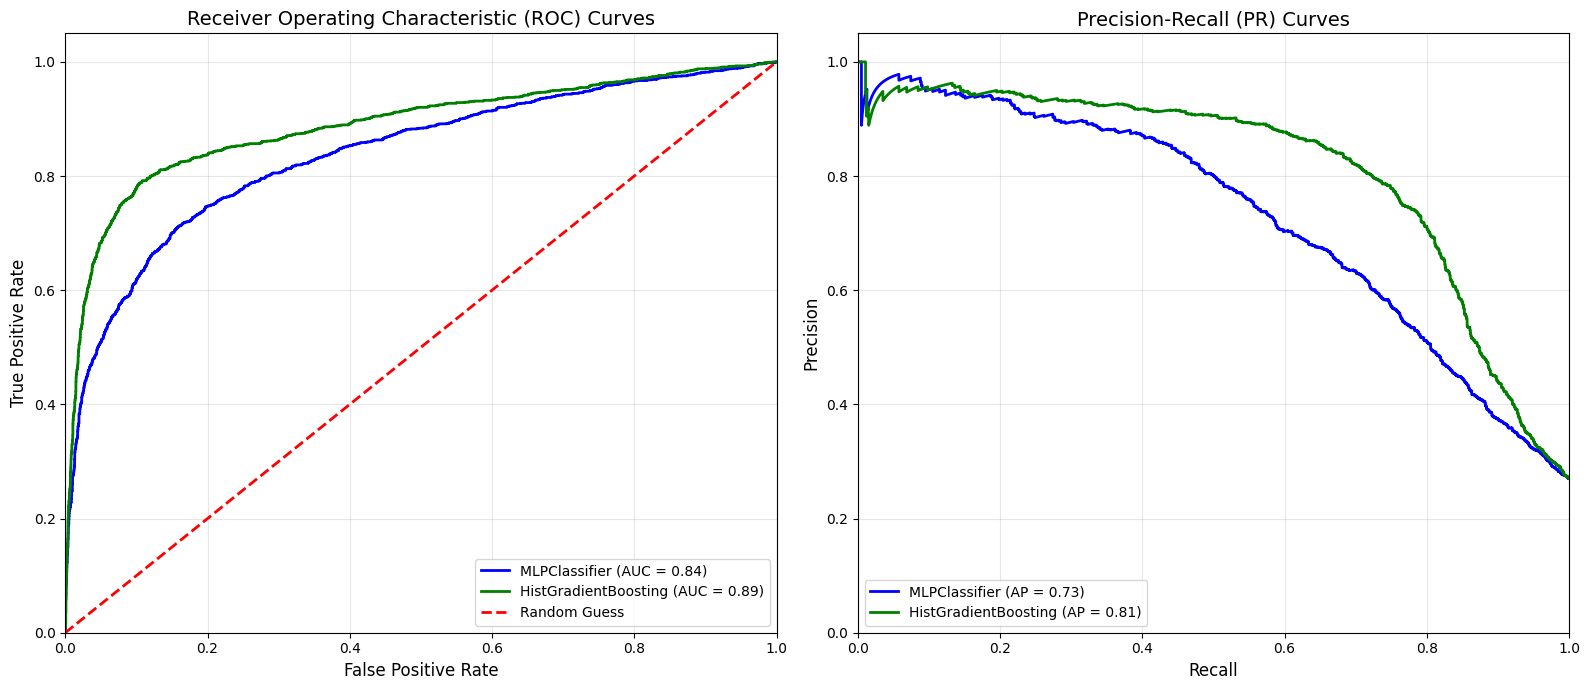

In [85]:


from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_proba_mlp = best_model_mlp.predict_proba(X_test)[:, 1]
y_proba_hgb = best_model_hgb.predict_proba(X_test)[:, 1]



# Compute ROC curve and ROC area for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_mapped, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Compute ROC curve and ROC area for HistGradientBoostingClassifier
fpr_gb, tpr_gb, _ = roc_curve(y_test_mapped, y_proba_hgb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Compute Precision-Recall curve and average precision for MLP
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test_mapped, y_proba_mlp)
avg_precision_mlp = average_precision_score(y_test_mapped, y_proba_mlp)

# Compute Precision-Recall curve and average precision for HistGradientBoostingClassifier
precision_gb, recall_gb, _ = precision_recall_curve(y_test_mapped, y_proba_hgb)
avg_precision_gb = average_precision_score(y_test_mapped, y_proba_hgb)

# Create subplots for ROC and Precision-Recall curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot ROC curves
ax1.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'MLPClassifier (AUC = {roc_auc_mlp:.2f})')
ax1.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'HistGradientBoosting (AUC = {roc_auc_gb:.2f})')
ax1.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
ax1.legend(loc="lower right", fontsize=10)
ax1.grid(alpha=0.3)

# Plot Precision-Recall curves
ax2.plot(recall_mlp, precision_mlp, color='blue', lw=2, label=f'MLPClassifier (AP = {avg_precision_mlp:.2f})')
ax2.plot(recall_gb, precision_gb, color='green', lw=2, label=f'HistGradientBoosting (AP = {avg_precision_gb:.2f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall', fontsize=12)
ax2.set_ylabel('Precision', fontsize=12)
ax2.set_title('Precision-Recall (PR) Curves', fontsize=14)
ax2.legend(loc="lower left", fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

*For analysis, please see section 7.1 Technical Perspective*

### 6.4 Checking for Overfitting

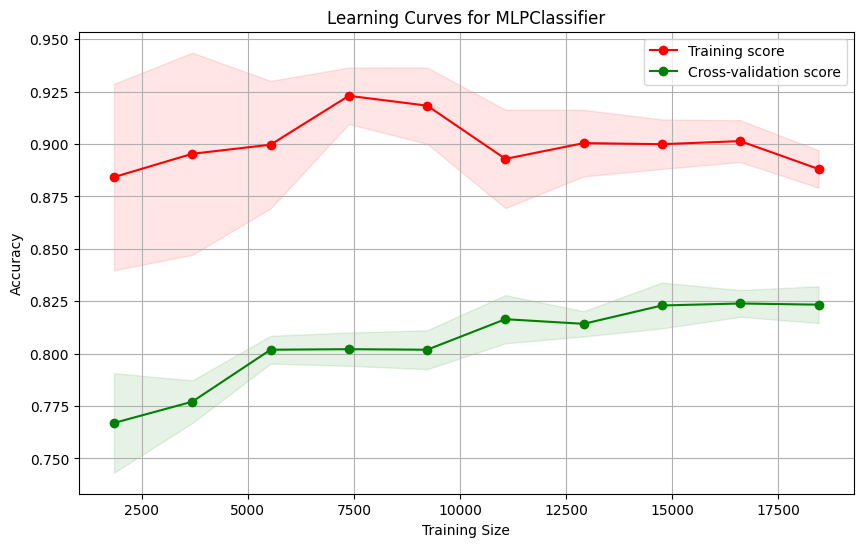

In [86]:
from sklearn.model_selection import learning_curve


# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model_mlp, X_train, y_train, cv=cv, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.title('Learning Curves for MLPClassifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

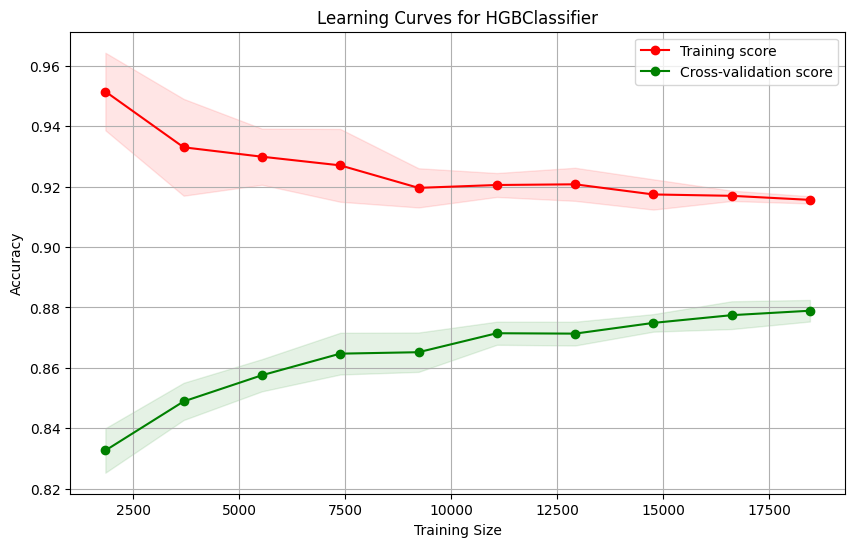

In [87]:

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model_hgb, X_train, y_train, cv=cv, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.title('Learning Curves for HGBClassifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


*For discussion on overfitting, please see section 7.1 Technical Perspective*

## 7. Final recommendation of the best model



### 7.1 Technical perspective- overfitting discussion, complexity and efficiency

#### 7.1.1 Performance and Metrices 

**1. Overall Accuracy**
- MLP: 0.8225 (about 82.25%)
- HGB: 0.8774 (about 87.74%)

*From this, HGB is outperforming MLP in terms of simple accuracy.*


**2. Classification Report Details**

MLP
- Class 0 - No Fraud: 
  - Precision: 0.87  
  - Recall: 0.89 (the model correctly identifies 89% of the “Class 0” cases)  
  - F1-score: 0.88  - overall good performance
- Class 1 Fraud:  
  - Precision: 0.69  
  - Recall: 0.63 (the model correctly identifies 63% of the “Class 1” cases)  
  - F1-score: 0.66   - overall score of precision and recall is lower

*Overall, MLP tends to do better on Class 0, but struggles more with Class 1.*

HGB
- Class 0:  
  - Precision: 0.89  
  - Recall: 0.94 (the model correctly identifies 94% of the “Class 0” cases)  
  - F1-score: 0.92  
- Class 1:  
  - Precision: 0.82  
  - Recall: 0.70 (the model correctly identifies 70% of the “Class 1” cases)  
  - F1-score: 0.75  

*HGB shows stronger performance for both classes overall—particularly it does a better job on Class 1 compared to MLP.*

**3. Confusion Matrices**

MLP

- 3761: True negatives (Class 0 correctly identified)  
- 450: False positives (Class 1 was predicted when it was actually 0)  
- *574: False negatives (Class 0 was predicted when it was actually 1)*  
- 983: True positives (Class 1 correctly identified)

HGB

- 3978: True negatives (Class 0 correctly identified)  
- 233: False positives (Class 1 was predicted when it was actually 0)  
- *474: False negatives (Class 0 was predicted when it was actually 1)*  
- 1083: True positives (Class 1 correctly identified)




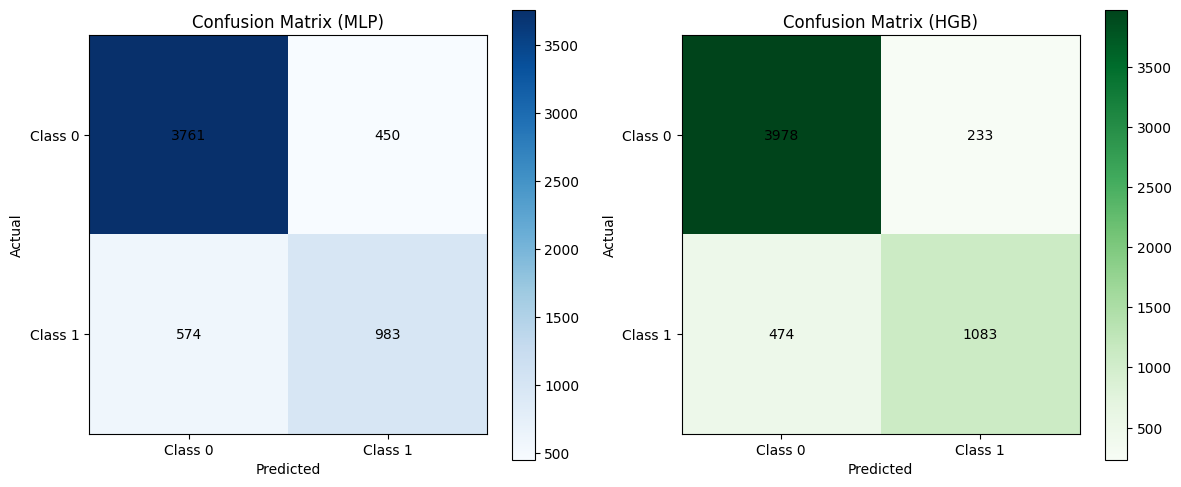

In [3]:


#Confusion matrix values 
cm_mlp = np.array([
    [3761, 450],
    [574,  983]
])

cm_hgb = np.array([
    [3978, 233],
    [474,  1083]
])


class_names = ['Class 0', 'Class 1']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#  Plot for MLP 
im1 = axes[0].imshow(cm_mlp, interpolation='nearest', cmap='Blues')
axes[0].set_title("Confusion Matrix (MLP)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Set up ticks & labels for MLP heatmap
axes[0].set_xticks(np.arange(len(class_names)))
axes[0].set_yticks(np.arange(len(class_names)))
axes[0].set_xticklabels(class_names)
axes[0].set_yticklabels(class_names)

# Annotate cells
for i in range(cm_mlp.shape[0]):
    for j in range(cm_mlp.shape[1]):
        axes[0].text(j, i, cm_mlp[i, j],
                     ha="center", va="center", color="black")


fig.colorbar(im1, ax=axes[0])

# Plot for HGB 
im2 = axes[1].imshow(cm_hgb, interpolation='nearest', cmap='Greens')
axes[1].set_title("Confusion Matrix (HGB)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Set up ticks & labels for HGB heatmap
axes[1].set_xticks(np.arange(len(class_names)))
axes[1].set_yticks(np.arange(len(class_names)))
axes[1].set_xticklabels(class_names)
axes[1].set_yticklabels(class_names)

# Annotate cells
for i in range(cm_hgb.shape[0]):
    for j in range(cm_hgb.shape[1]):
        axes[1].text(j, i, cm_hgb[i, j],
                     ha="center", va="center", color="black")


fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()


**Comparing the matrices:**
- HGB has fewer false positives (233 vs. 450) and fewer false negatives (474 vs. 574) than MLP.
- That means HGB is doing a better job of correctly labeling both Class 0 and Class 1 instances.
- In terms of fraud detection, the false negatives are more critical as they represent missed fraudulent claims. The false positives on the other hand are less critical as they represent genuine claims that were incorrectly flagged as fraudulent; these can be further investigated for verification.

#### 7.1.2 Learning Curves & Overfitting

**Learning Curves**

HGB
- Training Score: Starts quite high (around 0.96) for small training sets and gradually decreases to the low 0.90s as training size grows.
- Cross‐Validation (CV) Score: Starts around 0.82–0.83 and steadily increases to about 0.88. 
- The training and CV curves move closer together as more data is used, suggesting the model is generalising well. 
- There maybe some overfitting at small training sizes, where the training accuracy is much higher than the CV accuracy; but this gap closes as more data is used. 
- Cross-Val (Training) Score: ~0.8756m Test Accuracy: 0.8774 - negligble gap between training and test accuracy, suggesting the model is not overfitting.
- At large training size, the F1 score is very similar between the test and training set, suggesting the model is not overfitting.

MLP
- Training Score: Fluctuates but is typically quite high (often above 0.90), peaking around 0.925 before dipping slightly toward the end.
Cross‐Validation (CV) Score: Starts around 0.75, climbs to the low 0.80s, and then slowly edges up to around 0.825.
- There is a larger and more persistent gap (about 0.10+ difference) between training and CV accuracy throughout most of the curve, although this does reduce with more data. 
- There is a lot more fluctuation in the MLP curves, suggesting it may be more sensitive to the training data.
- The MLP model is more prone to overfitting, as indicated by the larger gap between training and CV scores.

- Cross-Val (Training) Score: ~0.8265 and Test Accuracy: 0.8225 That’s only a 0.4% difference, which is very minor and suggests the model generalises well and not overfitting.
- At large training size, the F1 score is very similar between the test and training set, suggesting the model is not overfitting.

**Precision Recall Curves**

ROC Curves & AUC
- MLP: AUC = 0.84
- HGB: AUC = 0.89
- Area Under the ROC Curve (AUC) is a measure of how well the model separates the classes across different decision thresholds. HGB has a higher AUC, indicating better class separability.

Precision‐Recall Curves & Average Precision (AP)
- MLP :AP = 0.81
- HGB :AP = 0.73
- Average Precision (AP) is a measure of the precision‐recall trade‐off and is representative of the area under the Precision-Recall curve. HGB has a higher AP, and stays above the blue curve (MLP) suggesting a stronger precision‐recall balance.



#### 7.1.3 Model Complexity and Efficiency

Complexity 
- MLP: Being a neural network model, it can need more extensive tuning with learning rate, hidden layers, activation functions is more sensitive to hyperparameters and can be prone to overfitting.

HGB: Being a tree-based model, it is generally less sensitive to hyperparameters, more robust to outliers, and can handle imbalanced datasets effectively. It is also more memory-efficient and faster than GradientBoostingClassifier. Also much more straightforward to tune and less prone to overfitting. 

Efficiency
- MLP: Training can be relatively slower for a large network or dataset, and it may require more computational resources. MLP can be regarded a black box model, making it harder to interpret the model. Inference can be fast once trained, but ultimately will depend on size. 
- HGB: Training is faster and more memory-efficient, making it suitable for large datasets and real-time applications. Also easier to extract features importance and interpret the model, compared to MLP. Inference can be quicker and more efficient then MLP, as decision trees are simpler to evaluate.  



#### 7.1.4 Conclusion from Technical Perspective
- Both models generalise very well to the test set, showing very similar results to the cross-val score, with no sign of overfitting. This may have been in part due to early stopping and cross-validation. 
- HGB not only has a higher overall accuracy (about 87.74% vs. 82.25%), but also better precision, recall, and F1-scores for both classes.
- The confusion matrix for HGB shows fewer mistakes in both labeling Class 0 and Class 1.
- HGB outperforms MLP in both ROC (AUC) and PR (AP) metrics, indicating better class separability and a stronger precision‐recall trade‐off.
- HGB’s learning curves suggest it is more stable and generalises better than MLP, which shows more overfitting and sensitivity to the training data.
- HGB is more efficient and less complex than MLP, making it a better choice for large datasets and real-time applications, especially involving fraud detection using a binary classification model and where speed and accuracy are crucial.
-HGB has a higher AUC and AP, indicating better class separability and a stronger precision‐recall trade‐off.
- Therefore, HGB is the stronger model in this comparison.

### 7.2 Business Perspective

The buisness perspective requirements:
- Find the average of all claims and calculate the gross profit for the company, assuming it is double the claims; this will require an annual profit calculation based on claims made for a fraction within the year
- Assuming 10% of customers base make claims, calculate the number of customers. 
- Based on the pricing model, calculate the error cost of the models and the potential savings from the model.

#### 7.2.1 Gross Profit Calculation

In [ ]:
# calculate the total claim amount

property_claim = df_pivot['AmountOfPropertyClaim'].sum()
print(f'total property claim {property_claim}')

injury_claim = df_pivot['AmountOfInjuryClaim'].sum()
print(f'total injury claim {injury_claim}')

vehicle_claim = df_pivot['AmountOfVehicleDamage'].sum()
print(f'total vehicl claim {vehicle_claim}')

total_claim = property_claim + injury_claim + vehicle_claim
print(f'total claim {total_claim}')



total property claim 210037681
total injury claim 211573147
total vehicl claim 1086746063
total claim 1508356891


In [91]:
# find highest and lowest dateofincident 
print(df_pivot['DateOfIncident'].min())
print(df_pivot['DateOfIncident'].max())

2015-01-01 00:00:00
2015-03-14 00:00:00


In [93]:
#calculate number of days between the highest and lowest date of incident
from datetime import datetime
date_format = "%Y-%m-%d"
a = datetime.strptime('2015-01-01', date_format)
b = datetime.strptime('2015-03-14', date_format)
delta = b - a
print(f'total number of days covered by data {delta.days}')

total number of days covered by data 72


In [96]:
#number of claims 
print(f'number of claims {df_pivot['Unique_ID'].count()}')

number of claims 28836


In [103]:
#average number of incidents per day
print(f' average number of incidents per day {df_pivot['Unique_ID'].count()/delta.days}')

#average claim amount per day
print(f' average claim amount per day {total_claim/delta.days}')

 average number of incidents per day 400.5
 average claim amount per day 20949401.263888888


In [115]:

#estimated annual claim cost
estimated_annual_claim_cost = total_claim/delta.days * 365
print(f'estimated annual claim cost: {estimated_annual_claim_cost:.2f}')

company_profit_needed = estimated_annual_claim_cost * 2
print(company_profit_needed)
print(f"Company Profit_needed: {company_profit_needed:.2f}")






estimated annual claim cost: 7646531461.32
15293062922.638887
Company Profit_needed: 15293062922.64


Presumabilty this figure is in Indian rupees given all the incidents are in India.

#### 7.2.2 Number of Customers

In [116]:
no_customers = df_pivot['Unique_ID'].count() * 10
print(f'no of customers: {no_customers.round()}')

# charge for each customer  
premium_per_customer = company_profit_needed/no_customers
print(f'premium per customer: Indian rupees ₹ {charge_per_customer:.2f}')

no of customers: 288360
premium per customer: Indian rupees ₹ 53034.62


₹ 53034.62 amounts to £499.42 per customer, for an insurance policy which sound reasonable.  

#### 7.2.3 Error Cost Calculation

In [119]:


total_claim_amount = total_claim 
num_claims = df_pivot['Unique_ID'].count()


# Model performance metrics (confusion matrix values)
fn_mlp = 574  # False negatives for MLP
fp_mlp = 450  # False positives for MLP

fn_gb = 474  # False negatives for Gradient Boosting
fp_gb = 233  # False positives for Gradient Boosting

# for annual error calculation
fn_mlp_annual = (fn_mlp / delta.days)*365
fp_mlp_annual = (fp_mlp / delta.days)*365

fn_gb_annual = (fn_gb / delta.days)*365
fp_gb_annual = (fp_gb / delta.days)*365

# Average Claim Amount per day
average_claim = total_claim_amount / num_claims #over 73 days
print("Average Claim Amount:", average_claim)

#Average Claim Amount per anum 
average_claim_annum = average_claim * 365

# Step 2: Calculate Total Customers
total_customers = no_customers
print("Total Customers:", total_customers)

# Step 3: Calculate Premium Per Customer

print("Premium Per Customer:", premium_per_customer)

# Step 4: Calculate Losses for MLP 
fn_loss_mlp = fn_mlp_annual * average_claim_annum # False negatives
fp_loss_mlp = fp_mlp_annual * 2 * average_claim_annum # False positives
total_loss_mlp = fn_loss_mlp + fp_loss_mlp # Total loss

print("\nMLP Losses:")
print("FN Loss:", fn_loss_mlp)
print("FP Loss:", fp_loss_mlp)
print("Total Loss:", total_loss_mlp)

# Step 5: Calculate Losses for Gradient Boosting
fn_loss_gb = fn_gb_annual * average_claim_annum
fp_loss_gb = fp_gb_annual * 2 * average_claim_annum
total_loss_gb = fn_loss_gb + fp_loss_gb

print("\nGradient Boosting Losses:")
print("FN Loss:", fn_loss_gb)
print("FP Loss:", fp_loss_gb)
print("Total Loss:", total_loss_gb)


Average Claim Amount: 52308.11801220696
Total Customers: 288360
Premium Per Customer: 53034.61965126539

MLP Losses:
FN Loss: 55556415815.68307
FP Loss: 87109362777.2034
Total Loss: 142665778592.88647

Gradient Boosting Losses:
FN Loss: 45877597729.327126
FP Loss: 45103292282.418655
Total Loss: 90980890011.74579


In summary:

Overall Loss Comparison:
- MLP: ₹ 142.66B total loss
- HGB: ₹ 90.98B total loss

MLP
- FN Loss: 55.56B
- FP Loss: 87.11B

HGB
- FN Loss: 45.88B
- FP Loss: 45.10B

HGB losses are balanced where as MLP has a higher loss from false positives, suggesting it is overestimating the number of fraudulent claims. Most importantly, the FN, which is the most critical error in fraud detection, is lower in HGB, suggesting it is better at identifying fraudulent claims.

HGB is significantly more cost-effective than MLP, with a potential saving of ₹ 51.68B;  due to HGB's better performance in correctly identifying fraudulent claims, leading to fewer false negatives and more savings for the company.

#### 7.3.4 Potential Savings and Loss from the Models

In [120]:
#If HGB chosen over MLP 

Savings_from_HGB = total_loss_mlp - total_loss_gb
print(f"Savings from HGB over MLP: ₹ {Savings_from_HGB:.2f}")

Savings from HGB over MLP: ₹ 51684888581.14


In [121]:
# How much HGB can cost the company due to false negatives

loss_from_HGB = fn_loss_gb
print(f"Loss from HGB due to False Negatives: ₹ {loss_from_HGB:.2f}")   

Loss from HGB due to False Negatives: ₹ 45877597729.33


In [123]:
 #Model performance metrics (confusion matrix values)
tp_mlp = 983  # True positive for MLP
tn_mlp = 3761  # True negative  for MLP

tn_gb = 3978 # True negatives for Gradient Boosting
tp_gb = 983  # True positives for Gradient Boosting

# for annual error calculation
tn_mlp_annual = (tn_mlp / delta.days)*365
tp_mlp_annual = (tp_mlp / delta.days)*365

tn_gb_annual = (tn_gb / delta.days)*365
tp_gb_annual = (tp_gb / delta.days)*365


#Calculate Gains  for Gradient Boosting
tn_gain_gb = tn_gb_annual * average_claim_annum # True negatives 
tp_gain_gb = tp_gb_annual * 2 * average_claim_annum # True positives
total_gain_gb = tn_gain_gb + tp_gain_gb # Total gain 



print("\nGradient Boosting Positives:")
print("TN Positive:", tn_gain_gb)
print("TP Positive:", tp_gain_gb)
print("Total Positives:", total_gain_gb)


Gradient Boosting Positives:
TN Positive: 385023383475.2391
TP Positive: 190285563577.7577
Total Positives: 575308947052.9968


In [126]:
#How much a company can save by using HGB over no model

#by using HGB, the company can correctly identify fraudent causes

savings_due_to_HGB = tp_gain_gb #identify fraud causes
print(f"Savings due to recognising fraud claims using HGB: ₹ {savings_due_to_HGB:.2f}")

total_savings = savings_due_to_HGB - loss_from_HGB #total savings 
print(f"Total Savings using HGB: ₹ {total_savings:.2f}")

Savings due to recognising fraud claims using HGB: ₹ 190285563577.76
Total Savings using HGB: ₹ 144407965848.43


#### 7.3.5 Conclusion from Business Perspective

- The company will save ₹ 144.4BN by using HGB; this includes loss due to false negatives and gains due to true positives. 

- HGB is more cost-effective than MLP, with a potential saving of ₹ 51.68B over MLP due to HGB's better performance in correctly identifying fraudulent claims, leading to fewer false negatives and more savings for the company.


#### 7.3 Overall Recommendation

HistGradientBoostingClassifier is recommended over MLPClassifier for the following reasons:

- HGB has a higher overall accuracy, precision, recall, and F1-scores for both classes.
- HGB shows fewer mistakes in both labeling Class 0 and Class 1.
- HGB outperforms MLP in both ROC (AUC) and PR (AP) metrics, indicating better class separability and a stronger precision‐recall trade‐off.
- HGB’s learning curves suggest it is more stable and generalises better than MLP, which shows more overfitting and sensitivity to the training data.
- HGB is more efficient and less complex than MLP, making it a better choice for large datasets and real-time applications, especially involving fraud detection using a binary classification model and where speed and accuracy are crucial.
- HGB is significantly more cost-effective than MLP, with a potential saving of ₹ 51.68B over MLP due to HGB's better performance in correctly identifying fraudulent claims, leading to fewer false negatives and more savings for the company.

Therefore, HGB is the stronger model in this comparison and is recommended for fraud detection in the insurance company.

## 8. Conclusion



#### 8.1 What has been successfully accomplished and what has not

After weeks of non-stop work, I have successfully pre-processeed the data, built two models, and evaluated them using nested cross-validation. I have also compared the models from both technical and business perspectives. The HistGradientBoostingClassifier model outperformed the MLPClassifier in terms of accuracy, precision, recall, F1-scores, and cost-effectiveness. The HGB model is more stable, generalises better, and is more efficient than the MLP model. It is also more cost-effective, with a potential saving of ₹ 51.68B over MLP due to its better performance in correctly identifying fraudulent claims. 

The aims and objectives in the project brief have been met, and the final recommendation is to use the HGB model for fraud detection in the insurance company.

What hasn't been accomplished is the unbiased predictive model having a balanced error of 5% or less. 

#### 8.2 Reflect back on the analysis and see what you could have done differently if you were to do the project again

- Balancing the weights was tricky using MLP, as the library didnt have built-in handling for class imbalance; this took significant time to resolve. In hinsight, I could have used a different model that has built-in handling for class imbalance.

- I could have used a different feature selection method, such as PCA, to see if it would have improved the model's performance.

- I also underestimated the time it would take to resolve technical issues throughout the model buiilding and nested cross-validation process. I could have allocated more time for this. I had to use RandomizedSearchCV instead of GridSearchCV for the MLP model due to the time constraints as GridSearchCV was taking too long to run.

#### 8.3 Add a wish list of future work that you would do to take the project forward

As future work, I would be interested in exploring the following:

- How Bayesian optimization could be used to tune the hyperparameters of the models more efficiently; also how this compares to GridSearchCV and RandomizedSearchCV.

- If there is scope for unsupervised learning techniques, such as anomaly detection, to identify fraudulent claims without the need for labels.

- How ensemble methods, such as stacking, could be used to combine the predictions of multiple models to improve the overall performance.

- Find models that have a lower error rate, approximating the 5% error rate target set in the project brief.

### 9. References

- Ahmad, I. (2023) 50 Algorithms Every Programmer Should Know: Tackle Computer Science Challenges with Classic to Modern Algorithms in Machine Learning, Software Design, Data Systems, and Cryptography. 2nd edn. Birmingham: Packt Publishing.
- Géron, A. (2022) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 3rd edn. Sebastopol, CA: O'Reilly Media.
- Raschka, S., Liu, Y. (H.) and Mirjalili, V. (2022) Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python. Birmingham: Packt Publishing.
- Tan, P.-N., Steinbach, M., Karpatne, A. and Kumar, V. (2018) Introduction to Data Mining. 2nd edn. Boston: Pearson Addison Wesley.

Websites
- [Scikit-learn: Model Evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Scikit-learn: Grid Search](https://scikit-learn.org/stable/modules/grid_search.html)
- [Scikit-learn: MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [Scikit-learn: HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)
- [Scikit-learn: Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
- [Imbalanced-learn: SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
- [Imbalanced-learn: ClusterCentroids](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html)
- [Imbalanced-learn: Pipeline](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html)
- [Imbalanced-learn: RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
- [Imbalanced-learn: RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)




Acknowledgement

- Generative AI - ChatGPT- 01 by OpenAI (2021) [OpenAI](https://platform.openai.com/docs/guides/gpt) 
- Context: Support tutor to aid understanding, debug code, and trouble shoot errors; research internet on resources needed for the project. 